In [1]:
import numpy as np
import pandas as pd
import time
import os.path

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as wg
from IPython.display import display
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from tqdm import tqdm
from scipy import stats
import random as random
import math

In [3]:
!pip install uncertainties

In [4]:
virus=pd.read_excel('data_app_new.xlsx') 

In [5]:
virus

,TP1,VP1,CDP1,TP2,VP2,CDP2,TP3,VP3,CDP3,TP4,VP4,CDP4
0,0,0.00000,1138.720,0,0.00000,770.000,0,0.00,675.00,0.0,0.000,600.386
1,10,5.41277,822.128,8,5.37748,647.680,7,5.72,447.00,25.0,3.780,704.735
2,17,7.69362,674.043,15,7.00000,480.795,23,7.15,317.00,31.0,5.560,451.208
3,24,6.40000,515.745,22,5.74000,290.000,30,6.84,504.00,38.0,5.990,606.990
4,31,5.54894,541.277,29,4.74000,719.000,37,4.14,570.00,48.0,3.890,562.593
5,38,5.41277,520.851,36,3.86000,576.150,44,3.87,470.49,188.0,3.180,449.662
6,175,4.52766,571.915,166,4.29000,468.870,178,3.18,653.26,437.0,3.182,607.700
7,337,5.17447,612.766,334,4.05000,544.370,345,3.83,513.98,NaN,NaN,NaN


In [6]:
import uncertainties as unc

In [7]:
virus

,TP1,VP1,CDP1,TP2,VP2,CDP2,TP3,VP3,CDP3,TP4,VP4,CDP4
0,0,0.00000,1138.720,0,0.00000,770.000,0,0.00,675.00,0.0,0.000,600.386
1,10,5.41277,822.128,8,5.37748,647.680,7,5.72,447.00,25.0,3.780,704.735
2,17,7.69362,674.043,15,7.00000,480.795,23,7.15,317.00,31.0,5.560,451.208
3,24,6.40000,515.745,22,5.74000,290.000,30,6.84,504.00,38.0,5.990,606.990
4,31,5.54894,541.277,29,4.74000,719.000,37,4.14,570.00,48.0,3.890,562.593
5,38,5.41277,520.851,36,3.86000,576.150,44,3.87,470.49,188.0,3.180,449.662
6,175,4.52766,571.915,166,4.29000,468.870,178,3.18,653.26,437.0,3.182,607.700
7,337,5.17447,612.766,334,4.05000,544.370,345,3.83,513.98,NaN,NaN,NaN


In [8]:
def virus_attack_1(y,t, k_1,k_8, ro_8, ro_V, r):
#     oprimized parameters
#     k_1,k_8, ro_8, ro_V = p  
#     states
    y1,y2, y3, y4 = y 
#     parameters
    s_3=5
#     ro_8=3.3*0.0001
    mu_C=0.015
    
    s_1=5
#     k_1=3.87*(0.001) 
    mu_T=0.02
    S=55.6
    p_1=0.16
#     r=0.02
    maxi=1500
    mu_ti=0.28    
#     k_8=4.5*0.0001
    ro_4=0.002
#     ro_V=100
    mu_V=3.0  
    k_10=7.79*1e-6
#     dy1dt = s_1+p_1*y4*y1/(y4+S)-k_1*y1*y4-mu_T*y1+r*y1*(1-(y1+y2)/maxi)
    dy1dt = s_1-k_1*y1*y4-mu_T*y1+r*y1*(1-(y1+y2)/maxi)
    dy2dt = k_1*y1*y4+ro_4*y2*(1-(y1+y2)/maxi)-k_8*y3*y2-mu_ti*y2
    dy3dt=s_3+ro_8*y2*y3-mu_C*y3
    dy4dt=ro_V*y2-k_10*y1*y4-mu_V*y4
#     print(p_1*y4*y1/(y4+S))
    return [dy1dt,dy2dt, dy3dt, dy4dt]

In [9]:
def fopdtPlot(k_1,k_8, ro_8, ro_V):
    patient=2
#     data['V']=np.power(10,data[str('VP')+str(patient)])
    virus['V']=np.power(10,virus[str('VP')+str(patient)])
    n = virus[str('TP')+str(patient)].shape[0]# time points to plot
    tf =virus[str('TP')+str(patient)][n-1]  # final time
    # Use initial condition
    y0 = [virus[str('CDP')+str(patient)].values[0],0, 617, virus['V'].values[0]]
    V = virus['V'].values
    CD = virus[str('CDP')+str(patient)].values
#     plt.plot(V)
#     plt.plot(CD)
    CDp = np.ones(n)*y0[0]
    Tip=np.ones(n)*y0[1]
    CCp=np.ones(n)*y0[2]
    Vp = np.ones(n)*y0[3]
    t=virus[str('TP')+str(patient)].values
#     t = np.linspace(0,tf,n) # create time vector
    iae = 0.0
    CD_pr=[]
    V_pr=[]
    t=virus[str('TP')+str(patient)].values-virus[str('TP')+str(patient)].values[0]
    # loop through all time steps
    for i in range(1,len(t)):
        # simulate process for one time step
        a=t[i-1]
        b=t[i]
        ts=np.linspace(a,b,b-a+1)
        inputs = (k_1,k_8, ro_8, ro_V )
        y = odeint(virus_attack_1,y0,ts,args=inputs)
        y0 = y[-1]  
#         print(y[1])# record new initial condition
        CDp[i] = y0[0]
        Tip[i]=y0[1]
        CCp[i]=y0[2]
        Vp[i] = y0[3]     
        
        iae += np.power(CD[i]-CDp[i], 2) + np.power(V[i]-Vp[i], 2)
        V_pr+=list(y[:,3][:-1])
        CD_pr+=list(y[:,0][:-1])
    # plot FOPDT response
    plt.figure(1,figsize=(15,7))
    plt.subplot(2,1,1)
    plt.ylabel(r'Viruses')
    plt.text(200,20,'Integral Abs Error: ' + str(np.round(iae,2)))
#     plt.plot(V_pr, 'y--',linewidth=2,label='V (sol)')
#     plt.plot(t, V,'ro',linewidth=2,label='V (meas)')
#     plt.plot(t, Vp,'bo',linewidth=2,label='V (pred)')
    plt.plot(CD_pr,'y--',linewidth=2,label='CD (sol)')
    plt.plot(t, CD,'bo',linewidth=2,label='CD (meas)')
    plt.plot(t, CDp,'r--',linewidth=2,label='CD (pred)')
    plt.legend(loc='best')
    plt.xlabel('time (sec)')

In [10]:
def sim_model(x):
    patient=2
    y0d = [virus[str('CDP')+str(patient)].values[0],0, 617, virus['V'].values[0]]
    ns= virus[str('TP')+str(patient)].shape[0]
    t= virus[str('TP')+str(patient)].values-virus[str('TP')+str(patient)].values[0]
    CDp = np.ones(ns)*y0d[0]
    Tip=np.ones(ns)*y0d[1]
    CCp=np.ones(ns)*y0d[2]
    Vp = np.ones(ns)*y0d[3] 
    V = virus['V'].values
    CD = virus[str('CDP')+str(patient)].values
    k_1,k_8, ro_8, ro_V, r =x
    CD_p=[]
    CD_ip=[]
    CTL_p=[]
    V_p=[]
    for i in range(0,ns-1):
        a=t[i]
        b=t[i+1]
        ts=np.linspace(a,b,b-a+1)
#         ts=[t[i], t[i+1]]
        inputs = (k_1,k_8, ro_8, ro_V , r)
        y = odeint(virus_attack_1,[CDp[i],Tip[i], CCp[i], Vp[i]],ts,args=inputs)     
        CDp[i+1] = y[-1,0]
        Tip[i+1]=y[-1,1]
        CCp[i+1]=y[-1,2]
        Vp[i+1] = y[-1,3]
        CD_p+=list(y[:,0][:-1])
        CD_ip+=list(y[:,1][:-1])
        CTL_p+=list(y[:,2][:-1])
        V_p+=list(y[:, 3][:-1])
    CD_p+=[y[:,0][-1]]
    CD_ip+=[y[:,1][-1]]
    CTL_p+=[y[:,2][-1]]
    V_p+=[y[:, 3][-1]]
    return CDp,Tip, CCp, Vp , CD_p, CD_ip, CTL_p, V_p   

def objective(x):
        # simulate model
    patient=2
    V = virus['V'].values
    CD = virus[str('CDP')+str(patient)].values
    CDp,Tip, CCp, Vp, CD_p, CD_ip, CTL_p, V_p  = sim_model(x)
    return sum(np.power(np.log(CDp)-np.log(CD), 2)+np.power(np.log(Vp)-np.log(V),2))

In [11]:
# calculate lower and upper prediction bands
def predband(x, xd, yd, f_vars, conf=0.95):
    """
    Arguments:
    - x: array with x values to calculate the confidence band.
    - xd, yd: data arrays.
    - a, b, c: linear fit parameters.
    - conf: desired confidence level, by default 0.95 (2 sigma)
    """
    alpha = 1. - conf    # Significance
    N = xd.size          # data sample size
    var_n = len(f_vars)  # Number of variables used by the fitted function.
    # Quantile of Student's t distribution for p=(1 - alpha/2)
    q = stats.t.ppf(1. - alpha / 2., N - var_n)
    # Std. deviation of an individual measurement (Bevington, eq. 6.15)
    se = np.sqrt(1. / (N - var_n) * np.sum((yd - simulate(xd, *f_vars)) ** 2))
    # Auxiliary definitions
    sx = (x - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = simulate(x, *f_vars)
    # Prediction band
    dy = q * se * np.sqrt(1. + (1. / N) + (sx / sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

In [12]:
def simulate(tm,k_1,k_8, ro_8, ro_V, r):
    patient=2
    t=virus[str('TP')+str(patient)].values
    T = np.zeros((len(t),4))
    T[0,0] = virus[str('CDP')+str(patient)].values[0]
    T[0,1]=0
    T[0,2] = 617
    T[0,3]= virus['V'].values[0]
    T0 = T[0]
    for i in range(len(t)-1):
        a=t[i]
        b=t[i+1]
        ts=np.linspace(a,b,b-a+1)
#         ts = [t[i],t[i+1]]
        inputs = (k_1,k_8, ro_8, ro_V , r)
        y = odeint(virus_attack_1,T0,ts,args=inputs)
        T0 = y[-1]
        T[i+1] = T0
    z = np.empty((len(t)*2))
    z[0:len(t)] = T[:,0]
    z[len(t):] = T[:,3]
    return z

In [13]:
def simulate2(p):
    patient=2
    t=virus[str('TP')+str(patient)].values
    T = np.zeros((len(t),4))
    T[0,0] =virus[str('CDP')+str(patient)].values[0]
    T[0,1]=0
    T[0,2] = 617
    T[0,3]= virus['V'].values[0]
    T0 = T[0]
    CD_p=[]
    CD_ip=[]
    CTL_p=[]
    V_p=[]
    for i in range(len(t)-1):
        a=t[i]
        b=t[i+1]
        ts=np.linspace(a,b,b-a+1)
#         ts = [t[i],t[i+1]]
        k_1,k_8, ro_8, ro_V, r =p
        inputs = (k_1,k_8, ro_8, ro_V, r )
        y = odeint(virus_attack_1,T0,ts,args=inputs)
        T0 = y[-1]
        T[i+1] = T0
        CD_p+=list(y[:,0][:-1])
        CD_ip+=list(y[:,1][:-1])
        CTL_p+=list(y[:,2][:-1])
        V_p+=list(y[:, 3][:-1])
    CD_p+=[y[:,0][-1]]
    CD_ip+=[y[:,1][-1]]
    CTL_p+=[y[:,2][-1]]
    V_p+=[y[:, 3][-1]]
    return T, CD_p, V_p, CD_ip, CTL_p

### install constrNMPy if needed

In [ ]:
# install library
!git clone https://github.com/alexblaessle/constrNMPy.git

In [ ]:
cd constrNMPy

In [ ]:
!python setup.py install

In [14]:
cd constrNMPy


C:\Users\Vanessik\Anaconda3\envs\gym-gpn\science_work\advanced-model-of-HIV\constrNMPy


In [15]:
'L-BFGS-B'
'SLSQP'
'nelder-mead'
import constrNMPy as cNM 


## Optimal values for patients

In [16]:
def solver(data, patient,params,  model,optimizer='nelder-mead', adjust=False, optimize=False, estimate=False):
    data['V']=np.power(10,data[str('VP')+str(patient)])
    virus['V']=np.power(10,virus[str('VP')+str(patient)])/2000
    n = data[str('TP')+str(patient)].shape[0]# time points to plot
    tf =data[str('TP')+str(patient)][n-1]  # final time
    # Use initial condition
    y0d = [data[str('CDP')+str(patient)].values[0],0, 617, data['V'].values[0]]
    V = data['V'].values
    CD = data[str('CDP')+str(patient)].values
#     plt.plot(V)
#     plt.plot(CD)
    CDp = np.ones(n)*y0d[0]
    Tip=np.ones(n)*y0d[1]
    CCp=np.ones(n)*y0d[2]
    Vp = np.ones(n)*y0d[3]

    t=data[str('TP')+str(patient)].values-data[str('TP')+str(patient)].values[0]
    k_1=0.0002
    k_8=0.0009
    ro_8=0.000658
    ro_V=33.65
    r=0.02
    if adjust:
        k_1_slide = wg.FloatSlider(value=0.0001,min=0.00040,max=0.003,step=0.00005)
#         print(k_1_slide)
        k_8_slide = wg.FloatSlider(value=0.0004,min=2*0.00010,max=4*0.001,step=0.0002)
        ro_8_slide = wg.FloatSlider(value=0.0005,min=3*0.0001,max=4*0.001,step=0.0002)
#         print(ro_8_slide)
        ro_V_slide = wg.FloatSlider(value=20,min=0.1,max=800,step=1)
        wg.interact(fopdtPlot, k_1=k_1_slide, k_8=k_8_slide, ro_8=ro_8_slide,ro_V=ro_V_slide)
        print('FOPDT Simulator: Adjust k_1, k_8, ro_8, and ro_V ' + \
              'to achieve lowest Integral Abs Error')

    if optimize:
        # initial guesses
        x0 = np.zeros(5)
        x0[0], x0[1], x0[2], x0[3], x0[4] = params# K1
        # rhoV
        
        print('Initial SSE Objective: ' + str(objective(x0)))
        print('Optimizing Values...')
        print( 'initial')
        print(x0[0], x0[1], x0[2], x0[3], x0[4])
        # minimize with bounds on variables
        bnds = ((0.0002, 0.03), (2.1*0.0001,0.006), (0.0003,8*0.001), (38, 43), (0.001, 0.07))
        LB=[0.00000002, 0.0001, 0.0001, 0.1, 0.001]
        UB=[0.089,2.5, 0.01, 6658, 0.04]


        _,_,_,_, CDp, Tip, CCp, Vp = sim_model(params)
        plt.figure(figsize=(20,10))
        plt.title('V patient')
        plt.subplot(4,1,1)
        plt.plot( np.log(CDp),'r',label=r'$CD4$ optimized')
        plt.plot(t,np.log(CD),'bo',label=r'$CD4$ measured')
        plt.legend(loc='best')
        plt.grid()
        plt.ylabel('log(Healthy T) (cells/mm3)')

        plt.subplot(4,1,2)
        plt.plot(np.log(Vp),'y',label=r'$V$ optimized')
        plt.plot(t, np.log(V),'bo',label=r'$V$ measured')
        plt.grid()
        plt.ylabel('log(Viruses) (particles/mm3)')
        plt.legend()

        plt.subplot(4,1,3)

        plt.plot(np.log(Tip),'b',label=r'$CD4$ infected cells')
        plt.grid()
        plt.ylabel('log(Inf T) (cells/mm3)')
        plt.legend(loc='best')
                
        plt.subplot(4,1,4)
        plt.plot(np.log(CCp),'b',label=r'$CTL$ cells')
        plt.grid()
        plt.ylabel('log(CTL) (cells/mm3)')
        plt.legend(loc='best')
        plt.show()

        solution=cNM.constrNM(objective,x0,LB,UB,full_output=True)
        # solution = minimize(objective,x0,bounds=bnds,method=optimizer)

        x = solution['xopt']
        print('opt los')
        print(solution['fopt'])
        # x=solution.x
        iae = objective(x)
        k_1,k_8, ro_8, ro_V, r  = x
        print('Final loss: ' + str(objective(x)))
        print('k_1: ' + str(k_1))
        print('k_8: ' + str(k_8))
        print('ro_8: ' + str(ro_8))
        print('ro_V: ' + str(ro_V))
        print('r: ' + str(r))
        _,_,_,_, CDp, Tip, CCp, Vp = sim_model(x)
        pinit=[k_1, k_8, ro_8, ro_V, r]
        Ti, CD_pinit, V_pinit, CD_ipinit, CTL_pinit  = simulate2(pinit)
        print('start loss')
        print(sum(np.power(np.log(Ti[:,0])-np.log(CD), 2)+np.power(np.log(Ti[:,3])-np.log(V),2)))
#         visualize
        plt.figure(figsize=(20,10))
        plt.title('V patient')
        plt.subplot(4,1,1)
        plt.plot( np.log(CDp),'r',label=r'$CD4$ optimized')
        plt.plot(t,np.log(CD),'bo',label=r'$CD4$ measured')
        plt.legend(loc='best')
        plt.grid()
        plt.ylabel('log(Healthy T) (cells/mm3)')

        plt.subplot(4,1,2)
        plt.plot(np.log(Vp),'y',label=r'$V$ optimized')
        plt.plot(t, np.log(V),'bo',label=r'$V$ measured')
        plt.grid()
        plt.ylabel('log(Viruses) (particles/mm3)')
        plt.legend()

        plt.subplot(4,1,3)

        plt.plot(np.log(Tip),'b',label=r'$CD4$ infected cells')
        plt.grid()
        plt.ylabel('log(Inf T) (cells/mm3)')
        plt.legend(loc='best')
                
        plt.subplot(4,1,4)
        plt.plot(np.log(CCp),'b',label=r'$CTL$ cells')
        plt.grid()
        plt.ylabel('log(CTL) (cells/mm3)')
        plt.legend(loc='best')
        plt.show()
        
        p_opt=[k_1,k_8, ro_8, ro_V, r]

    if estimate:
        # Parameter initial guess
        k_1 =k_1
        k_8 =k_8
        ro_8 = ro_8
        ro_V = ro_V
        r=r
        pinit = [k_1,k_8, ro_8, ro_V, r]
        x = []
        y = np.empty((len(t)*2))
        y[0:len(t)] = CD
        y[len(t):] = V
        
        popt, pcov = curve_fit(simulate, x, y, p0=pinit, bounds=(0, [0.03, 0.009, 0.009, 7000, 0.4]), method='trf')
        sigma_ab = np.sqrt(np.diagonal(pcov))
        # an easy way to properly format parameter errors
        from uncertainties import ufloat
        k_1uu= ufloat(popt[0], sigma_ab[0])
        k_8uu= ufloat(popt[1], sigma_ab[1])
        ro_8uu= ufloat(popt[2], sigma_ab[2])
        ro_Vuu= ufloat(popt[3], sigma_ab[3])
        r_uu= ufloat(popt[4], sigma_ab[4])
        
        print("Best fit parameters:")
        k_1u, k_8u, ro_8u, ro_Vu, r_u = unc.correlated_values(popt, pcov)
        print(k_1u)
        print(k_8u)
        print(ro_8u)
        print(ro_Vu)
        print(r_u)
        
        print('intervals')
        print(k_1uu)
        print(k_8uu)
        print(ro_8uu)
        print(ro_Vuu)
        print(r_uu)
        # create prediction band
        lpb, upb = predband(y, y, y, popt, conf=0.95)
        lpb1 = np.empty((len(t)))
        lpb2 = np.empty((len(t)))
        upb1 = np.empty((len(t)))
        upb2 = np.empty((len(t)))
        lpb1[0:len(t)] = lpb[0:len(t)]
        lpb2[0:len(t)] = lpb[len(t):]
        upb1[0:len(t)] = upb[0:len(t)]
        upb2[0:len(t)] = upb[len(t):]
        # optimized parameter values with uncertainties
        print('Optimal Parameters with Uncertanty Range')
        print('k1: ' + str(k_1u))
        print('k8: ' + str(k_8u))
        print('ro8: ' + str(ro_8u))
        print('roV: ' + str(ro_Vu))
        print('r: ' + str(r_u))
#         vizualize
        Ti, CD_pinit, V_pinit, CD_ipinit, CTL_pinit  = simulate2(pinit)
        Tp ,  CD_popt, V_popt, CD_ipopt, CTL_popt= simulate2(popt)
        print('start loss')
        print(sum(np.power(np.log(Ti[:,0])-np.log(CD), 2)+np.power(np.log(Ti[:,3])-np.log(V),2)))
        print('final loss')
        print(sum(np.power(np.log(Tp[:,0])-np.log(CD), 2)+np.power(np.log(Tp[:,3])-np.log(V),2)))


        plt.figure(figsize=(20,10))
        print(popt)
        
        plt.title('V patient')
        plt.subplot(4,1,1)
        plt.plot(np.log(CD_popt),'r',label=r'$CD4$ optimized')
        plt.plot(np.log(CD_pinit),'y',label=r'$CD$ initial')
        # plt.plot(CD_pinit,'y',label=r'$CD$ initial')
        plt.plot(t,np.log(CD),'bo',label=r'$CD4$ measured')
#         plt.plot(t,Tp[:,0],'ro',label=r'$CD$ optimized')
#         plt.plot(t,lpb1,'k:')
#         plt.plot(t,upb1,'k:')
#         plt.ylabel('helthy cells (particles/mm3)')
        plt.legend(loc='best')
        plt.grid()
        plt.ylabel('log(Healthy T) (cells/mm3)')
#         plt.xlabel('Time (day)')
        plt.subplot(4,1,2)
        plt.plot(np.log(V_pinit),'y',label=r'$V$ initial')
        plt.plot(np.log(V_popt),'r',label=r'$V$ optimized')
#         plt.plot(t, Ti[:,3],'bo',label=r'$V$ initial')
        plt.plot(t, np.log(V),'bo',label=r'$V$ measured')
#         plt.plot(t, Tp[:,3],'bo',label=r'$V$ optimized')
#         plt.plot(t, lpb2,'k:')
#         plt.plot(t,upb2,'k:')
        plt.grid()
        plt.ylabel('log(Viruses) (particles/mm3)')
        plt.legend()
#         plt.xlabel('Time (day)')
        
        plt.subplot(4,1,4)
#         plt.plot(CD_ipinit,'y',label=r'$CD$ inf initial')
        plt.plot(np.log(CD_ipopt),'b',label=r'$CD4$ infected cells')
        plt.grid()
        plt.ylabel('log(Inf. T) (cells/mm3)')
        plt.legend(loc='best')
                
        plt.subplot(4,1,3)
#         plt.plot(CTL_pinit,'y',label=r'$V$ initial')
        plt.plot(np.log(CTL_popt),'b',label=r'$CTL$ cells')
        plt.grid()
        plt.ylabel('log(CTL) (cells/mm3)')
        plt.legend(loc='best')
        plt.show()
    
    return p_opt, iae



Initial SSE Objective: 62.92284538794582
Optimizing Values...
initial
1.1977765234836707e-05 0.010181658736502112 0.009999999735228405 3225.3083621055575 0.025465404267111868


C:\Users\Vanessik\Anaconda3\envs\gym-gpn\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log


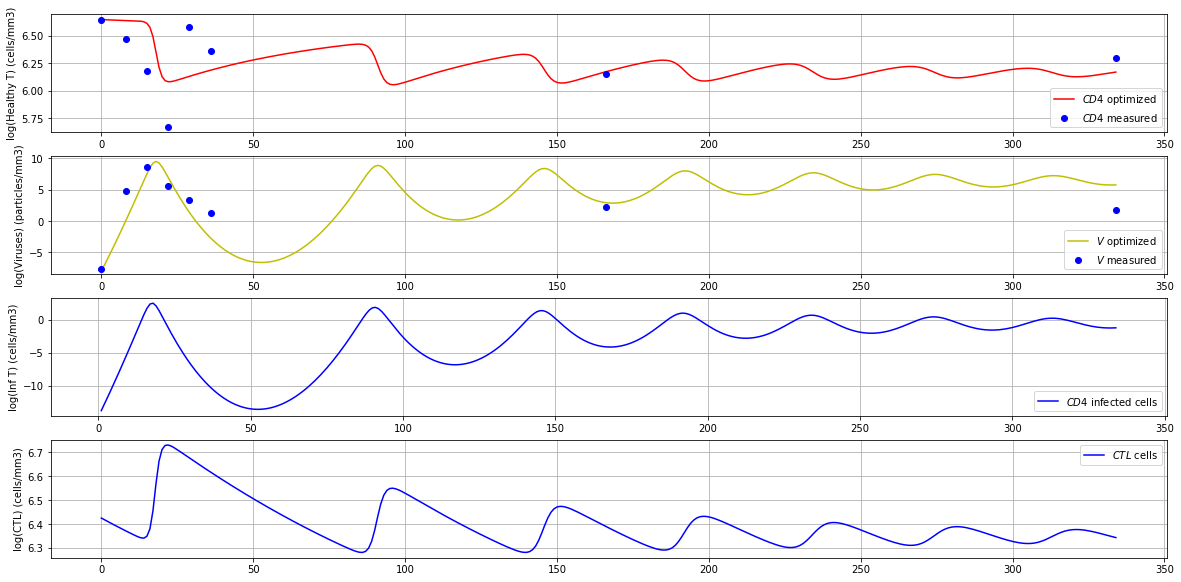

C:\Users\Vanessik\Anaconda3\envs\gym-gpn\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log


opt los
58.78065143888497
Final loss: 58.78065143888497
k_1: 1.472194689926393e-05
k_8: 0.02130555113756902
ro_8: 0.00668264340683306
ro_V: 5030.615177041995
r: 0.020542049146455
start loss
58.78065143888497


C:\Users\Vanessik\Anaconda3\envs\gym-gpn\lib\site-packages\ipykernel_launcher.py:120: RuntimeWarning: divide by zero encountered in log


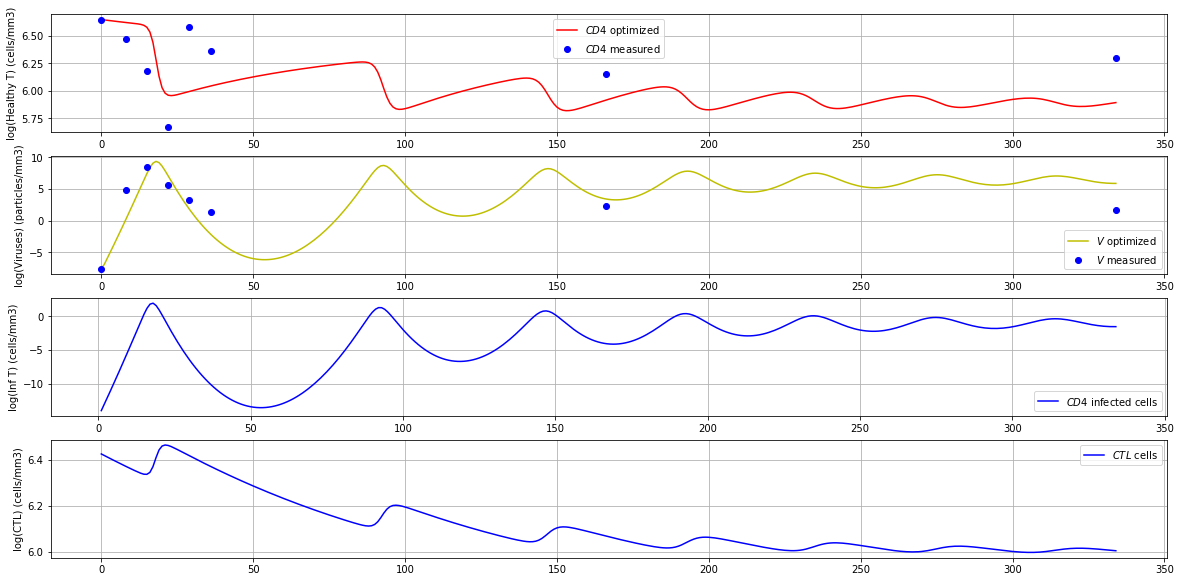

In [18]:
LB=[0.00000002, 0.0001, 0.0001, 0.1, 0.001]
UB=[0.089,2.5, 0.01, 6658, 0.04]
params=[ 1.1977765234836707e-5,0.010181658736502112,0.009999999735228405,3225.3083621055575,0.025465404267111868]
p_opt, iae=solver(virus, 2, params, virus_attack_1, optimize=True)

# estimate=True then we use curve fit and nonlinear least-squares
# adjust=True the we try to find optimal parameters in real time but we also need to change intervals

## BOOTSTRAP

In [62]:
def sim_model_new(x):
    k_1,k_8, ro_8, ro_V, r =x
    CD_p=[]
    CD_ip=[]
    CTL_p=[]
    V_p=[]
    for i in range(0,n-1):
        a=t[i]
        b=t[i+1]
        ts=np.linspace(a,b,b-a+1)
        inputs = (k_1,k_8, ro_8, ro_V , r)
        y = odeint(virus_attack_1,[CDp[i],Tip[i], CCp[i], Vp[i]],ts,args=inputs)     
        CDp[i+1] = y[-1,0]
        Tip[i+1]=y[-1,1]
        CCp[i+1]=y[-1,2]
        Vp[i+1] = y[-1,3]
        CD_p+=list(y[:,0][:-1])
        CD_ip+=list(y[:,1][:-1])
        CTL_p+=list(y[:,2][:-1])
        V_p+=list(y[:, 3][:-1])
    CD_p+=[y[:,0][-1]]
    CD_ip+=[y[:,1][-1]]
    CTL_p+=[y[:,2][-1]]
    V_p+=[y[:, 3][-1]]
    return CDp,Tip, CCp, Vp , CD_p, CD_ip, CTL_p, V_p   

def objective_new(x):
    CDp,Tip, CCp, Vp, CD_p, CD_ip, CTL_p, V_p  = sim_model_new(x) 
    return sum(100*np.power(np.log(CDp)-np.log(CD), 2)+np.power(np.log(Vp)-np.log(V),2))

In [63]:
def normal(CD, V):
    norm=True
    for l in range(V.shape[0]):
        if V[l]<0:
            norm=False
    for j in range(CD.shape[0]):
        if CD[j]<0:
            norm=False
    print('problems with data')
    print(CD,V)
    return norm  
def generate():
    V=np.exp(np.log(virus['V'].values)+random.normalvariate(0,1)*np.sqrt(sigmas[0]))
    CD=np.exp(np.log(virus[str('CDP')+str(patient)].values)+random.normalvariate(0,1)*np.sqrt(sigmas[0]))
    return CD, V

In [64]:

# num samples
M=500
# patient
patient=1

sigmas=[]
losses=[]
all_CD=[]
all_V=[]
k1_opt=[]
k8_opt=[]
ro8_opt=[]
roV_opt=[]
r_opt=[]
sigma_k1=[]
sigma_k8=[]
sigma_ro8=[]
sigma_roV=[]
sigma_r=[]
# LB=[0.00000002, 0.0001, 0.0001, 0.1, 0.001]
# UB=[0.089,2.5, 0.01, 6658, 0.04]
# params=[  1.1973990321385735e-05,0.010181658736502112,0.009999999735228405,3225.3083621055575,0.025465404267111868]
matrix_of_params= pd.DataFrame([[  4.625996598963772e-06,0.011977765234836707,0.0035720902779899015,6657.999445229463,0.02295012116083297]], columns = ['k1', 'k8','ro8', 'roV', 'r' ]) 
n = virus[str('TP')+str(patient)].shape[0]# time points to plot
tf =virus[str('TP')+str(patient)][n-1]  # final time
virus['V']=np.power(10,virus[str('VP')+str(patient)])/2000
y0d = [virus[str('CDP')+str(patient)].values[0],0, 617, virus['V'].values[0]]
V = virus['V'].values
CD = virus[str('CDP')+str(patient)].values
CDp = np.ones(n)*y0d[0]
Tip=np.ones(n)*y0d[1]
CCp=np.ones(n)*y0d[2]
Vp = np.ones(n)*y0d[3]
t=virus[str('TP')+str(patient)].values-virus[str('TP')+str(patient)].values[0]
# random.seed(4)
x0 = np.zeros(5)
k1_opt.append(4.625996598963772e-06)
k8_opt.append(0.011977765234836707)
ro8_opt.append(0.0035720902779899015)
roV_opt.append( 6657.999445229463)
r_opt.append(0.02295012116083297)

x0[0] = k1_opt[0]# K1
x0[1] = k8_opt[0]# K8
x0[2] = ro8_opt[0]# rho8
x0[3] = roV_opt[0]
x0[4]=r_opt[0]
all_V.append(V)
all_CD.append(CD)

LB=[0.00000002, 0.0001, 0.0001, 0.1, 0.001]
UB=[0.089,2.5, 0.01, 6658, 0.04]

solution=cNM.constrNM(objective_new,x0,LB,UB,full_output=True)
x = solution['xopt']
iae = objective_new(x)
losses.append(iae)
sigmas.append(losses[0]/16)


for i in tqdm(range(M)):    
    CD, V=generate()
    all_V.append(V)
    all_CD.append(CD)
    y0d=[CD[0], 0, 617, V[0]]
    CDp = np.ones(n)*y0d[0]
    Tip=np.ones(n)*y0d[1]
    CCp=np.ones(n)*y0d[2]
    Vp = np.ones(n)*y0d[3]

    x0=[k1_opt[i], k8_opt[i], ro8_opt[i], roV_opt[i], r_opt[i]]
    LB=[0.00000002, 0.0001, 0.0001, 0.1, 0.001]
    UB=[0.089,2.5, 0.01, 6658, 0.04]
    # LB=[0, 0, 0, 0, 0]
    # UB=[None, None, None, None, None]
    solution=cNM.constrNM(objective_new,x0,LB,UB,)
    x  = solution['xopt']
    print(x)
    iae = objective_new(x)
    print(iae)
    sigma=iae/16
    losses.append(iae)
    sigmas.append(sigma)
    k_1,k_8, ro_8, ro_V, r  = x
    matrix_of_params.loc[str(i+1)]=[k_1,k_8, ro_8, ro_V, r] 

    shape=matrix_of_params['k1'].shape[0]
    # print(matrix_of_params['k1'].shape[0])
    # print(matrix_of_params['k1'])
    k1_=matrix_of_params['k1'].sum()/shape
    k8_=matrix_of_params['k8'].sum()/shape
    ro8_=matrix_of_params['ro8'].sum()/shape
    roV_=matrix_of_params['roV'].sum()/shape
    r_=matrix_of_params['r'].sum()/shape

        
    k1_opt.append(k1_)
    k8_opt.append(k8_)
    ro8_opt.append(ro8_)
    roV_opt.append(roV_)
    r_opt.append(r_)

    sigma_k1.append(math.sqrt(np.power(matrix_of_params['k1']-k1_, 2).sum()/(shape-1)))
    sigma_k8.append(math.sqrt(np.power(matrix_of_params['k8']-k8_, 2).sum()/(shape-1)))
    sigma_ro8.append(math.sqrt(np.power(matrix_of_params['ro8']-ro8_, 2).sum()/(shape-1)))
    sigma_roV.append(math.sqrt(np.power(matrix_of_params['roV']-roV_, 2).sum()/(shape-1)))
    sigma_r.append(math.sqrt(np.power(matrix_of_params['r']-r_, 2).sum()/(shape-1)))



    

C:\Users\Vanessik\Anaconda3\envs\gym-gpn\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log


  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

[3.94747476e-04 4.53101879e-03 4.73187943e-03 3.46657384e+03
 3.99999978e-02]
36.65348446580464




  0%|▏                                                                               | 1/500 [00:09<1:16:58,  9.25s/it]

[3.13557765e-03 7.02165504e-03 5.06168567e-03 2.83650160e+03
 3.99999294e-02]
49.605344474785646




  0%|▎                                                                               | 2/500 [00:12<1:01:40,  7.43s/it]

[1.69306418e-05 4.82938642e-02 1.04795914e-03 6.60110063e+03
 3.99993101e-02]
105.84166606076208




  1%|▍                                                                               | 3/500 [00:37<1:44:08, 12.57s/it]

[1.25562617e-04 1.58333984e-02 7.49582548e-04 1.17666843e+03
 1.40028906e-02]
142.29405379767766




  1%|▋                                                                               | 4/500 [01:07<2:27:21, 17.83s/it]

[7.35488876e-04 1.04284547e-01 3.03263941e-03 4.14776879e+03
 3.13904498e-02]
nan




  1%|▊                                                                               | 5/500 [01:39<3:04:00, 22.30s/it]

[7.86182739e-04 1.63967509e-01 2.78731241e-03 5.51598277e+03
 3.99974784e-02]
5754.8817814883




  1%|▉                                                                               | 6/500 [02:33<4:20:13, 31.61s/it]

[1.37288479e-05 1.93363132e-02 7.95502211e-04 6.38578346e+03
 3.80516158e-02]
203.97025901192518




  1%|█                                                                               | 7/500 [02:52<3:49:02, 27.88s/it]

[1.70136166e-03 6.08997544e-03 6.67587979e-03 9.44388765e+02
 5.26933671e-03]
36.080790716426606




  2%|█▎                                                                              | 8/500 [03:05<3:11:20, 23.33s/it]

[1.17175926e-03 2.35641112e-01 2.58304907e-03 3.88047793e+03
 3.31793122e-02]
nan




  2%|█▍                                                                              | 9/500 [03:37<3:34:18, 26.19s/it]

[3.79082781e-05 7.35842130e-03 1.08271448e-03 2.10515948e+03
 7.78342569e-03]
132.4255628284401




  2%|█▌                                                                             | 10/500 [04:04<3:35:41, 26.41s/it]

[7.38534004e-04 1.86383402e-01 2.92002677e-03 3.97440047e+03
 2.84203516e-02]
nan




  2%|█▋                                                                             | 11/500 [04:53<4:30:27, 33.19s/it]

[7.38534004e-04 8.09112402e-02 2.92002677e-03 3.97440047e+03
 3.12808425e-02]
21122.624555165625




  2%|█▉                                                                             | 12/500 [05:33<4:46:08, 35.18s/it]

[7.88556993e-04 1.59667338e-01 3.06642083e-03 4.06718845e+03
 2.94922547e-02]
16396.4911560505




  3%|██                                                                             | 13/500 [06:26<5:27:38, 40.37s/it]

[2.15797267e-03 5.17796936e-01 9.99997019e-03 6.65754207e+03
 2.65086829e-02]
186.29120527711808




  3%|██▏                                                                            | 14/500 [06:55<5:01:12, 37.19s/it]

[4.18514245e-03 6.63155948e-01 9.99997831e-03 5.41423087e+03
 3.99999478e-02]
166.5949511827734




  3%|██▎                                                                            | 15/500 [07:22<4:35:38, 34.10s/it]

[9.62424374e-04 1.72749599e-01 3.93629045e-03 4.01274577e+03
 3.36590393e-02]
11293.450052964125




  3%|██▌                                                                            | 16/500 [08:21<5:35:49, 41.63s/it]

[5.71758471e-04 2.90904982e-03 2.65548967e-03 2.44592214e+03
 3.99794637e-02]
40.94700335601164




  3%|██▋                                                                            | 17/500 [08:31<4:16:21, 31.85s/it]

[2.08053235e-04 1.06893018e-01 1.00002886e-04 6.65799913e+03
 2.04209391e-02]
228.4511509107047




  4%|██▊                                                                            | 18/500 [09:11<4:36:37, 34.43s/it]

[9.72360539e-04 3.12813476e-01 3.56413160e-03 4.25909655e+03
 2.95992310e-02]
17955.17741722276




  4%|███                                                                            | 19/500 [10:11<5:36:48, 42.01s/it]

[6.15060710e-05 9.55548854e-02 7.68075026e-04 6.30633300e+03
 3.48190924e-02]
147.78450958463395




  4%|███▏                                                                           | 20/500 [10:50<5:29:54, 41.24s/it]

[1.21150461e-04 7.02526468e-02 1.00001078e-04 6.65799973e+03
 2.80807216e-02]
260.8939588634188




  4%|███▎                                                                           | 21/500 [11:28<5:21:40, 40.29s/it]

[8.92266696e-04 3.18550329e-01 3.27957764e-03 4.46119381e+03
 2.97674743e-02]
nan




  4%|███▍                                                                           | 22/500 [12:11<5:25:53, 40.91s/it]

[6.81334994e-04 1.92617487e-01 1.69190075e-03 5.57868269e+03
 3.57131359e-02]
9893.151488460779




  5%|███▋                                                                           | 23/500 [13:10<6:10:05, 46.55s/it]

[1.56348178e-05 2.18306267e-02 1.22124036e-03 6.56238880e+03
 1.82082724e-02]
126.75280910100564




  5%|███▊                                                                           | 24/500 [13:39<5:27:55, 41.33s/it]

[8.72704345e-04 2.12800400e-01 3.89782029e-03 4.52930877e+03
 2.97741858e-02]
13519.081218281337




  5%|███▉                                                                           | 25/500 [14:34<5:58:01, 45.22s/it]

[5.68957061e-05 2.09527970e-01 3.71695508e-03 4.98983951e+03
 3.18074141e-02]
289.105172961218




  5%|████                                                                           | 26/500 [14:43<4:32:34, 34.50s/it]

[8.20322366e-04 1.46249997e-01 3.18363712e-03 4.60250657e+03
 2.96353673e-02]
13467.039292406522




  5%|████▎                                                                          | 27/500 [15:30<5:01:20, 38.23s/it]

[2.25744791e-05 7.09002637e-02 3.20457700e-03 6.64514154e+03
 3.50569410e-02]
82.02808756012384




  6%|████▍                                                                          | 28/500 [15:50<4:17:01, 32.67s/it]

[6.30145129e-04 1.45182995e-01 4.62636856e-03 4.37612144e+03
 2.98112706e-02]
10744.671762160884




  6%|████▌                                                                          | 29/500 [16:11<3:49:01, 29.18s/it]

[8.09691870e-04 2.14692832e-01 3.82294479e-03 4.87439425e+03
 3.09716910e-02]
16058.201198504472




  6%|████▋                                                                          | 30/500 [16:59<4:32:18, 34.76s/it]

[1.92246391e-06 4.59156358e-03 2.09949321e-03 5.11929425e+03
 3.70128597e-02]
68.80189895353183




  6%|████▉                                                                          | 31/500 [17:19<3:58:45, 30.55s/it]

[7.53403078e-04 1.81665292e-01 3.19321353e-03 4.62930105e+03
 3.01340531e-02]
15050.051548518877




  6%|█████                                                                          | 32/500 [18:27<5:25:46, 41.77s/it]

[1.22901568e-04 5.89832421e-02 1.00000924e-04 6.65799988e+03
 1.70175029e-02]
232.9636948888746




  7%|█████▏                                                                         | 33/500 [19:06<5:18:56, 40.98s/it]

[2.09047803e-04 4.89868307e-02 5.51348076e-04 6.38350567e+03
 3.99939471e-02]
3858.5141254786395




  7%|█████▎                                                                         | 34/500 [19:49<5:22:48, 41.56s/it]

[5.27232991e-04 1.89879380e-01 3.14623345e-04 6.59560308e+03
 3.99906535e-02]
7442.538724585979




  7%|█████▌                                                                         | 35/500 [20:28<5:14:45, 40.61s/it]

[6.47704401e-04 2.02294244e-01 3.49663193e-03 5.13654982e+03
 3.24073406e-02]
nan




  7%|█████▋                                                                         | 36/500 [21:04<5:03:07, 39.20s/it]

[5.81756325e-04 1.87501055e-01 3.06842656e-03 5.40230598e+03
 3.07327026e-02]
9181.252909834575




  7%|█████▊                                                                         | 37/500 [22:05<5:54:08, 45.89s/it]

[4.04600532e-04 1.13426270e-01 1.31821504e-03 5.36636834e+03
 3.99513068e-02]
7054.1080017698605




  8%|██████                                                                         | 38/500 [22:33<5:11:21, 40.44s/it]

[6.54038983e-04 1.96579890e-01 2.52032677e-03 5.01577087e+03
 3.33272752e-02]
13689.56817760826




  8%|██████▏                                                                        | 39/500 [23:32<5:53:40, 46.03s/it]

[6.75852166e-04 1.88026511e-01 2.92018618e-03 4.93686306e+03
 3.15287436e-02]
14244.021318784431




  8%|██████▎                                                                        | 40/500 [24:18<5:53:52, 46.16s/it]

[7.03738974e-04 1.47864303e-01 4.05396608e-03 4.77983186e+03
 3.16834486e-02]
9576.533202826255




  8%|██████▍                                                                        | 41/500 [25:11<6:08:30, 48.17s/it]

[1.21721827e-03 5.43178407e-02 9.99744265e-03 2.17029195e+03
 3.99954053e-02]
110.18442809358766




  8%|██████▋                                                                        | 42/500 [25:47<5:38:09, 44.30s/it]

[7.12030033e-04 2.09899037e-01 1.52444456e-03 5.62135052e+03
 3.74149353e-02]
6039.986626969407




  9%|██████▊                                                                        | 43/500 [26:47<6:14:03, 49.11s/it]

[1.61495806e-05 6.48259790e-03 4.23668606e-03 4.16738511e+03
 1.87901031e-03]
114.3457917089324




  9%|██████▉                                                                        | 44/500 [27:06<5:04:54, 40.12s/it]

[4.39931018e-04 6.58661685e-02 9.99999315e-03 6.65799336e+03
 3.99999929e-02]
144.801561922335




  9%|███████                                                                        | 45/500 [27:42<4:55:48, 39.01s/it]

[2.58193879e-05 7.16635723e-02 4.65736387e-03 5.02214239e+03
 3.24258672e-02]
68.38801563929839




  9%|███████▎                                                                       | 46/500 [28:13<4:34:59, 36.34s/it]

[3.88186435e-05 5.90133326e-02 2.85531070e-03 6.57023726e+03
 3.49775259e-02]
152.920632301603




  9%|███████▍                                                                       | 47/500 [28:39<4:11:31, 33.32s/it]

[7.93099507e-04 2.28385612e-01 3.25402666e-03 4.74983725e+03
 3.37682963e-02]
11926.954599677994




 10%|███████▌                                                                       | 48/500 [29:10<4:05:01, 32.53s/it]

[1.17833634e-04 2.54328282e-01 9.99980421e-03 4.70665521e+03
 3.25398638e-02]
85.62200465999442




 10%|███████▋                                                                       | 49/500 [29:42<4:05:06, 32.61s/it]

[2.81096080e-05 4.26972188e-02 4.28044119e-03 3.06036443e+03
 3.87097913e-02]
75.16328157959981




 10%|███████▉                                                                       | 50/500 [30:44<5:09:43, 41.30s/it]

[1.25281851e-04 5.23181950e-02 1.00000026e-04 6.65799947e+03
 3.80895186e-02]
236.13220525893905




 10%|████████                                                                       | 51/500 [31:56<6:17:15, 50.41s/it]

[1.00120359e-05 2.02558476e-02 1.83871749e-03 5.80933568e+03
 3.23465171e-02]
105.61403581653563




 10%|████████▏                                                                      | 52/500 [33:10<7:09:25, 57.51s/it]

[2.25399449e-03 3.27840671e-01 9.70035161e-03 3.55758645e+03
 1.00002488e-03]
167.2528508789056




 11%|████████▎                                                                      | 53/500 [33:46<6:21:47, 51.25s/it]

[1.71085718e-04 4.02115180e-02 1.00427794e-04 6.38424825e+03
 3.99819432e-02]
8400.925473769505




 11%|████████▌                                                                      | 54/500 [35:05<7:21:51, 59.44s/it]

[7.38198574e-04 1.95843580e-01 3.77357617e-03 4.51708445e+03
 3.17996880e-02]
10311.007122081493




 11%|████████▋                                                                      | 55/500 [36:30<8:19:03, 67.29s/it]

[1.88973866e-03 1.38484807e-01 3.41108750e-03 4.91828392e+03
 3.32899613e-02]
39036.75946235719




 11%|████████▊                                                                      | 56/500 [37:16<7:29:11, 60.70s/it]

[4.57010584e-04 1.56089708e-01 3.58090800e-03 5.48260082e+03
 3.15330485e-02]
7641.317915738365




 11%|█████████                                                                      | 57/500 [38:51<8:44:59, 71.10s/it]

[7.90385350e-04 2.05458473e-01 3.99985823e-03 5.12889340e+03
 3.35651222e-02]
18097.21708607027




 12%|█████████▏                                                                     | 58/500 [40:28<9:40:37, 78.82s/it]

[2.77576961e-04 6.00764461e-02 1.00066265e-04 5.71830169e+03
 3.99972258e-02]
7203.490211657455




 12%|█████████▎                                                                     | 59/500 [41:53<9:52:01, 80.55s/it]

[4.98592605e-05 1.86142642e-01 3.78899231e-03 5.20428319e+03
 3.27185829e-02]
368.27450207869896




 12%|█████████▍                                                                     | 60/500 [42:50<9:00:15, 73.67s/it]

[1.62870928e-03 8.94978968e-03 9.99999994e-03 9.87420508e+02
 3.99999994e-02]
35.10621899661111




 12%|█████████▋                                                                     | 61/500 [43:31<7:46:15, 63.72s/it]

[6.84888643e-03 2.20900395e-02 9.99985274e-03 2.20073708e+02
 2.17464757e-02]
82.83765686548278




 12%|█████████▊                                                                     | 62/500 [44:27<7:29:25, 61.56s/it]

[7.67355331e-04 2.16225390e-01 3.58145258e-03 4.79526356e+03
 3.37069436e-02]
8090.287593891672




 13%|█████████▉                                                                     | 63/500 [45:54<8:24:29, 69.27s/it]

[3.67159489e-05 3.91923093e-02 2.61121960e-03 4.70259348e+03
 3.46790880e-02]
176.85888844439282




 13%|██████████                                                                     | 64/500 [46:17<6:41:18, 55.23s/it]

[2.24077401e-04 2.06036831e-02 9.99999980e-03 6.65798705e+03
 1.30765630e-02]
81.95467821980795




 13%|██████████▎                                                                    | 65/500 [46:53<5:57:45, 49.35s/it]

[1.22038697e-04 9.92319524e-03 7.52192682e-03 6.65779721e+03
 3.86311579e-02]
98.76192479994027




 13%|██████████▍                                                                    | 66/500 [47:14<4:56:30, 40.99s/it]

[7.90747248e-04 2.55544282e-01 4.07360523e-03 4.36925638e+03
 3.22740363e-02]
nan




 13%|██████████▌                                                                    | 67/500 [48:20<5:49:17, 48.40s/it]

[9.15511780e-05 9.40587927e-02 1.11089308e-04 5.81945177e+03
 3.31179212e-02]
173.08413447856614




 14%|██████████▋                                                                    | 68/500 [49:10<5:51:47, 48.86s/it]

[1.89168404e-04 2.45337046e-02 9.99999997e-03 6.65799978e+03
 3.99999992e-02]
155.7202292722002




 14%|██████████▉                                                                    | 69/500 [49:47<5:25:39, 45.34s/it]

[2.20245874e-04 1.27786171e-01 1.00002708e-04 6.65799997e+03
 2.78482303e-02]
243.37262948395502




 14%|███████████                                                                    | 70/500 [50:56<6:15:35, 52.41s/it]

[8.38941015e-04 8.91548588e-03 1.00000000e-02 1.95249669e+03
 3.99999988e-02]
34.53304460076271




 14%|███████████▏                                                                   | 71/500 [51:40<5:57:51, 50.05s/it]

[8.59640497e-04 2.70020032e-01 4.27042016e-03 5.17806344e+03
 2.90616336e-02]
nan




 14%|███████████▍                                                                   | 72/500 [52:53<6:45:44, 56.88s/it]

[7.18957089e-04 1.30394425e-01 3.80686614e-03 4.87055498e+03
 3.12271834e-02]
nan




 15%|███████████▌                                                                   | 73/500 [54:54<9:00:34, 75.96s/it]

[1.53547764e-05 2.16155942e-02 6.33033552e-04 6.17820870e+03
 1.96878146e-02]
133.36653705429882




 15%|███████████▋                                                                   | 74/500 [56:02<8:44:21, 73.85s/it]

[3.21976666e-06 1.01248109e-02 2.59985356e-03 6.51061030e+03
 3.88634901e-02]
62.80078718880672




 15%|███████████▊                                                                   | 75/500 [56:54<7:55:48, 67.17s/it]

[7.00281567e-04 1.27380630e-01 3.74922345e-03 4.90934062e+03
 3.11758273e-02]
nan




 15%|████████████                                                                   | 76/500 [58:34<9:05:09, 77.14s/it]

[7.88364789e-04 2.04958150e-01 4.45823915e-03 4.19125707e+03
 3.21921811e-02]
12896.63117607648




 15%|███████████▊                                                                 | 77/500 [1:00:15<9:54:23, 84.31s/it]

[3.79164429e-04 2.43981281e-01 9.47107553e-04 6.29334760e+03
 3.67039748e-02]
254.62889941227482




 16%|████████████                                                                 | 78/500 [1:01:26<9:24:30, 80.26s/it]

[9.44392905e-04 1.29518016e-01 4.45692202e-03 5.04215068e+03
 3.12694459e-02]
nan




 16%|████████████▏                                                                | 79/500 [1:02:48<9:26:33, 80.74s/it]

[6.46802220e-06 4.26475361e-03 4.50640476e-03 6.57887391e+03
 1.00026960e-03]
105.88907329836584




 16%|████████████▎                                                                | 80/500 [1:03:34<8:12:50, 70.41s/it]

[5.94233290e-04 1.64410956e-01 4.55339737e-03 5.00110128e+03
 3.11253228e-02]
11319.361363965669




 16%|████████████▍                                                                | 81/500 [1:05:22<9:28:37, 81.42s/it]

[5.27442351e-05 6.08538238e-02 6.05353810e-03 2.25200813e+03
 3.86871478e-02]
73.40097255060843




 16%|████████████▋                                                                | 82/500 [1:06:50<9:42:00, 83.54s/it]

[6.30454360e-05 1.57851524e-01 4.06940683e-03 5.55260987e+03
 3.20831318e-02]
7858.769251913138




 17%|████████████▊                                                                | 83/500 [1:08:20<9:53:23, 85.38s/it]

[7.77075751e-05 9.85450453e-02 5.26674007e-03 4.71990087e+03
 3.71734933e-02]
146.0137591952746




 17%|████████████▉                                                                | 84/500 [1:08:57<8:11:29, 70.89s/it]

[2.22936326e-05 7.63336322e-03 4.02951420e-03 6.64831879e+03
 1.00015989e-03]
119.13496223846909




 17%|█████████████                                                                | 85/500 [1:09:58<7:50:52, 68.08s/it]

[5.67799046e-05 1.56284018e-01 4.09341918e-03 5.57483564e+03
 3.18288280e-02]
3213.1208924649536




 17%|█████████████▏                                                               | 86/500 [1:11:25<8:28:12, 73.65s/it]

[7.41722534e-04 1.98557788e-01 3.91795576e-03 4.75290341e+03
 3.36494215e-02]
12806.64445645584




 17%|█████████████▍                                                               | 87/500 [1:12:09<7:25:38, 64.74s/it]

[1.16908469e-04 2.73219861e-02 1.00052043e-04 6.63046507e+03
 3.99999020e-02]
3086.074834948441




 18%|█████████████▌                                                               | 88/500 [1:12:36<6:06:05, 53.31s/it]

[3.43070739e-06 3.05270477e-03 1.93476331e-03 2.92600533e+03
 2.91904956e-02]
100.50009791001618




 18%|█████████████▋                                                               | 89/500 [1:12:51<4:46:44, 41.86s/it]

[3.00538582e-04 9.18335996e-03 9.82998402e-03 5.32905436e+03
 2.25838361e-02]
38.05759715331375




 18%|█████████████▊                                                               | 90/500 [1:13:12<4:03:20, 35.61s/it]

[5.19743760e-05 1.72799361e-01 4.17386684e-03 5.24806662e+03
 3.25176624e-02]
1490.077774846734




 18%|██████████████                                                               | 91/500 [1:13:50<4:08:13, 36.41s/it]

[6.78158277e-04 1.64404954e-01 4.15863595e-03 4.46529393e+03
 3.20745977e-02]
15299.432503614718




 18%|██████████████▏                                                              | 92/500 [1:14:39<4:32:49, 40.12s/it]

[6.72243763e-06 1.81705543e-02 2.19897024e-03 6.03771298e+03
 3.94518896e-02]
83.66451181763662




 19%|██████████████▎                                                              | 93/500 [1:14:57<3:47:27, 33.53s/it]

[2.53655762e-05 2.46923621e-02 5.30054929e-04 6.12372754e+03
 3.97230965e-02]
195.79982402706966




 19%|██████████████▍                                                              | 94/500 [1:15:25<3:35:45, 31.88s/it]

[4.44573954e-04 5.93662855e-02 9.99997434e-03 6.45291380e+03
 3.99999996e-02]
109.26605051972604




 19%|██████████████▋                                                              | 95/500 [1:15:43<3:07:16, 27.74s/it]

[6.28775734e-04 1.50323120e-01 3.81040429e-03 5.23021492e+03
 3.12805355e-02]
36033.87924713833




 19%|██████████████▊                                                              | 96/500 [1:16:33<3:51:14, 34.34s/it]

[5.57223527e-04 1.57976000e-01 3.92328538e-03 5.06393509e+03
 3.15700999e-02]
10958.21304399629




 19%|██████████████▉                                                              | 97/500 [1:17:18<4:13:02, 37.67s/it]

[6.18633869e-04 1.22669968e-01 5.22008148e-03 5.04200548e+03
 3.10779947e-02]
16780.6648674478




 20%|███████████████                                                              | 98/500 [1:18:08<4:36:41, 41.30s/it]

[6.92711537e-04 1.98468292e-01 4.12964275e-03 4.95062144e+03
 3.06363640e-02]
10705.465981100904




 20%|███████████████▏                                                             | 99/500 [1:18:55<4:46:55, 42.93s/it]

[2.73007974e-05 2.26589202e-02 1.27107097e-03 6.15227402e+03
 1.10668012e-02]
134.19300959274656




 20%|███████████████▏                                                            | 100/500 [1:19:25<4:19:49, 38.97s/it]

[6.05430232e-04 1.57234113e-01 1.50545511e-04 4.78728940e+03
 3.98686784e-02]
11075.026065886233




 20%|███████████████▎                                                            | 101/500 [1:19:55<4:02:20, 36.44s/it]

[5.42467100e-03 1.29136691e+00 8.37448998e-03 4.83606281e+03
 8.68296539e-03]
184.46180048404128




 20%|███████████████▌                                                            | 102/500 [1:20:10<3:18:00, 29.85s/it]

[1.24694460e-05 8.60626455e-03 3.77785677e-03 6.60426681e+03
 1.00048861e-03]
109.05407235307781




 21%|███████████████▋                                                            | 103/500 [1:20:52<3:41:35, 33.49s/it]

[7.86740108e-04 1.92186672e-01 4.77942190e-03 4.40467664e+03
 2.93079581e-02]
10695.061520209058




 21%|███████████████▊                                                            | 104/500 [1:22:19<5:28:28, 49.77s/it]

[1.11805451e-04 1.22920132e-01 7.96422312e-04 6.39896297e+03
 3.11660464e-02]
170.9341982995396




 21%|███████████████▉                                                            | 105/500 [1:23:34<6:16:59, 57.27s/it]

[2.30285473e-04 5.22822358e-02 9.99999995e-03 6.65799988e+03
 2.98948237e-02]
204.04583045553946




 21%|████████████████                                                            | 106/500 [1:24:25<6:03:13, 55.31s/it]

[3.50599926e-04 2.27622167e-02 9.99932581e-03 4.30469466e+03
 2.70324709e-02]
83.37981507729218




 21%|████████████████▎                                                           | 107/500 [1:25:19<5:59:39, 54.91s/it]

[9.04754319e-05 1.19613400e-01 4.23450276e-03 5.11340167e+03
 3.57292573e-02]
145.59580382101493




 22%|████████████████▍                                                           | 108/500 [1:25:56<5:23:15, 49.48s/it]

[5.36230686e-04 1.08061314e-01 4.72944317e-03 4.35675291e+03
 3.95080688e-02]
8121.455121211957




 22%|████████████████▌                                                           | 109/500 [1:27:44<7:17:37, 67.15s/it]

[2.17559299e-04 7.87473923e-03 9.99984324e-03 6.65728403e+03
 3.99993998e-02]
38.80754089281021




 22%|████████████████▋                                                           | 110/500 [1:28:27<6:28:36, 59.79s/it]

[1.41008329e-05 3.72286168e-02 6.10405288e-03 6.65399622e+03
 3.79936936e-02]
157.2874150200354




 22%|████████████████▊                                                           | 111/500 [1:29:28<6:31:38, 60.41s/it]

[4.52572996e-05 2.11183414e-02 1.00000492e-04 6.65799997e+03
 2.16282383e-02]
292.63754240982234




 22%|█████████████████                                                           | 112/500 [1:30:32<6:36:00, 61.24s/it]

[1.29116658e-05 1.32403523e-02 7.16545063e-04 6.47852027e+03
 3.75079197e-02]
173.6382991058906




 23%|█████████████████▏                                                          | 113/500 [1:31:20<6:09:13, 57.24s/it]

[6.16135545e-04 3.05052546e-01 3.94812357e-03 5.07184854e+03
 3.06819769e-02]
27003.844954908942




 23%|█████████████████▎                                                          | 114/500 [1:32:39<6:52:09, 64.07s/it]

[6.16135541e-04 1.68177532e-01 5.04039449e-03 5.07184854e+03
 3.07263379e-02]
14293.89604152981




 23%|█████████████████▍                                                          | 115/500 [1:34:13<7:47:18, 72.83s/it]

[5.98267360e-05 1.51266226e-01 4.31567518e-03 5.34331580e+03
 3.34732204e-02]
85.40269514208259




 23%|█████████████████▋                                                          | 116/500 [1:34:33<6:05:39, 57.13s/it]

[7.62684230e-05 5.13198782e-02 1.31526809e-03 6.65799741e+03
 3.59713657e-02]
304.2460943456764




 23%|█████████████████▊                                                          | 117/500 [1:35:04<5:14:19, 49.24s/it]

[7.96504897e-05 5.90966660e-02 1.65627945e-03 6.65799433e+03
 3.99999977e-02]
309.6396872602715




 24%|█████████████████▉                                                          | 118/500 [1:36:06<5:37:48, 53.06s/it]

[2.35070838e-05 9.07700458e-02 4.38606057e-03 5.43284582e+03
 3.22004117e-02]
70.95669093722488




 24%|██████████████████                                                          | 119/500 [1:37:08<5:54:09, 55.77s/it]

[7.83259389e-05 1.27862345e-01 9.89451913e-03 2.79892084e+03
 3.41450247e-02]
58.6455017402182




 24%|██████████████████▏                                                         | 120/500 [1:37:43<5:13:00, 49.42s/it]

[5.93300015e-04 1.48631496e-01 3.97225130e-03 5.57973753e+03
 3.25708050e-02]
21246.531635514202




 24%|██████████████████▍                                                         | 121/500 [1:38:34<5:16:27, 50.10s/it]

[2.85268815e-03 4.22277070e-03 4.32888414e-03 4.75352058e+02
 3.99999988e-02]
37.16896671131983




 24%|██████████████████▌                                                         | 122/500 [1:38:50<4:09:54, 39.67s/it]

[2.42470706e-05 9.05918663e-02 4.60279735e-03 5.79747850e+03
 3.20621922e-02]
46.5848581726843




 25%|██████████████████▋                                                         | 123/500 [1:39:08<3:29:13, 33.30s/it]

[6.33407784e-04 1.86310083e-01 3.78545745e-03 5.17633418e+03
 3.23717525e-02]
11624.434949145782




 25%|██████████████████▊                                                         | 124/500 [1:40:14<4:30:08, 43.11s/it]

[9.50804048e-04 4.83300242e-01 1.00527361e-04 6.65705938e+03
 1.82943620e-02]
214.19803899452705




 25%|███████████████████                                                         | 125/500 [1:40:43<4:01:39, 38.67s/it]

[5.37691126e-04 1.48165407e-01 3.81655716e-03 5.84871289e+03
 3.16453004e-02]
6415.260727759804




 25%|███████████████████▏                                                        | 126/500 [1:41:43<4:41:14, 45.12s/it]

[6.09302678e-04 1.30200925e-01 4.68755586e-03 5.07685181e+03
 3.08810087e-02]
nan




 25%|███████████████████▎                                                        | 127/500 [1:42:28<4:40:00, 45.04s/it]

[1.58707627e-04 3.52974191e-02 1.39882343e-04 6.13764314e+03
 3.99999760e-02]
3794.5622386061614




 26%|███████████████████▍                                                        | 128/500 [1:42:44<3:46:38, 36.56s/it]

[5.99967942e-04 3.07949840e-01 3.92626384e-03 5.08718994e+03
 3.09428884e-02]
36793.67819754624




 26%|███████████████████▌                                                        | 129/500 [1:43:36<4:13:22, 40.98s/it]

[1.88297325e-04 3.86346777e-02 3.30538854e-03 6.09782700e+03
 3.99523934e-02]
3033.555451585469




 26%|███████████████████▊                                                        | 130/500 [1:44:15<4:09:11, 40.41s/it]

[1.73673799e-03 8.92863703e-03 9.91650436e-03 9.46581577e+02
 3.99071945e-02]
34.523024757508246




 26%|███████████████████▉                                                        | 131/500 [1:44:28<3:18:51, 32.33s/it]

[7.29067606e-04 2.09267513e-01 3.05338854e-03 4.51457750e+03
 3.56251568e-02]
10805.288495319403




 26%|████████████████████                                                        | 132/500 [1:45:27<4:07:17, 40.32s/it]

[9.94217048e-04 1.29818019e-01 3.95697643e-03 5.05729963e+03
 3.49324898e-02]
nan




 27%|████████████████████▏                                                       | 133/500 [1:46:08<4:07:18, 40.43s/it]

[1.39057969e-03 1.31296553e-01 4.14141735e-03 4.82059694e+03
 3.43999639e-02]
32567.514759346188




 27%|████████████████████▎                                                       | 134/500 [1:46:54<4:17:07, 42.15s/it]

[2.80401814e-04 7.51784587e-02 9.99999947e-03 6.65799985e+03
 4.00000000e-02]
227.44546270163318




 27%|████████████████████▌                                                       | 135/500 [1:47:17<3:41:44, 36.45s/it]

[1.20213697e-05 7.20160279e-03 4.12087089e-03 6.40780274e+03
 1.00161253e-03]
107.44239069071449




 27%|████████████████████▋                                                       | 136/500 [1:47:37<3:11:13, 31.52s/it]

[4.26200173e-04 1.48727156e-01 4.02256291e-03 5.85824456e+03
 3.09396299e-02]
6846.686842123128




 27%|████████████████████▊                                                       | 137/500 [1:48:31<3:50:51, 38.16s/it]

[2.96633943e-03 1.25613557e+00 1.52772997e-03 6.65783113e+03
 3.16460347e-02]
214.98639841441616




 28%|████████████████████▉                                                       | 138/500 [1:49:21<4:11:37, 41.71s/it]

[4.85418758e-06 1.33654001e-02 1.52430726e-03 6.54178288e+03
 3.99988319e-02]
90.17376817481693




 28%|█████████████████████▏                                                      | 139/500 [1:49:49<3:47:17, 37.78s/it]

[5.68148110e-05 1.64886010e-01 4.25810190e-03 5.72360629e+03
 3.22103972e-02]
4253.499438611871




 28%|█████████████████████▎                                                      | 140/500 [1:50:29<3:50:38, 38.44s/it]

[1.36453010e-04 3.29449597e-02 1.00002169e-04 6.65780105e+03
 3.99999551e-02]
8554.04695361692




 28%|█████████████████████▍                                                      | 141/500 [1:51:00<3:36:37, 36.20s/it]

[2.69426099e-06 8.69817003e-03 7.37326621e-03 5.41356629e+03
 3.45954077e-02]
47.550581617756876




 28%|█████████████████████▌                                                      | 142/500 [1:51:26<3:17:25, 33.09s/it]

[6.13105574e-04 1.34503835e-01 3.96715455e-03 5.12179988e+03
 3.11812661e-02]
nan




 29%|█████████████████████▋                                                      | 143/500 [1:52:03<3:23:35, 34.22s/it]

[4.52365251e-04 9.07987935e-02 1.17667433e-04 3.78532818e+03
 3.95948175e-02]
9529.867330379533




 29%|█████████████████████▉                                                      | 144/500 [1:52:52<3:49:22, 38.66s/it]

[4.36718533e-05 1.64630834e-01 4.98237402e-03 5.29965118e+03
 3.23319991e-02]
322.9663004631171




 29%|██████████████████████                                                      | 145/500 [1:53:23<3:35:19, 36.39s/it]

[5.93428916e-04 1.44957792e-01 4.80460688e-03 5.01373794e+03
 3.99683209e-02]
7735.200583503046




 29%|██████████████████████▏                                                     | 146/500 [1:54:15<4:02:54, 41.17s/it]

[4.78923649e-03 1.29009075e-02 9.99947249e-03 3.34795886e+02
 3.99705852e-02]
52.5393596390162




 29%|██████████████████████▎                                                     | 147/500 [1:54:45<3:41:05, 37.58s/it]

[4.27874016e-05 1.00002591e-04 9.99786622e-03 6.47952757e+03
 3.99996690e-02]
2824.3163818874277




 30%|██████████████████████▍                                                     | 148/500 [1:55:11<3:19:56, 34.08s/it]

[1.43981544e-04 7.25688278e-02 9.92434247e-04 6.62561563e+03
 1.95490872e-02]
239.16887898259955




 30%|██████████████████████▋                                                     | 149/500 [1:55:42<3:14:51, 33.31s/it]

[1.20205839e-05 1.76812371e-02 5.93835298e-03 6.48986329e+03
 1.86791835e-02]
166.1204083829694




 30%|██████████████████████▊                                                     | 150/500 [1:56:05<2:56:38, 30.28s/it]

[7.05819238e-04 1.87295437e-01 3.77726514e-03 4.29286015e+03
 3.70017475e-02]
11213.569079933579




 30%|██████████████████████▉                                                     | 151/500 [1:57:06<3:48:36, 39.30s/it]

[4.03754151e-04 1.25232206e-01 6.63659516e-03 6.40257872e+03
 1.07424378e-02]
187.45400128196715




 30%|███████████████████████                                                     | 152/500 [1:57:36<3:32:17, 36.60s/it]

[5.93511897e-04 3.14565341e-01 1.00555319e-04 6.65739826e+03
 2.13464999e-02]
221.6806141119435




 31%|███████████████████████▎                                                    | 153/500 [1:58:20<3:44:37, 38.84s/it]

[6.23816753e-04 1.33112231e-01 4.01699639e-03 5.12286064e+03
 3.10992641e-02]
24840.140054046456




 31%|███████████████████████▍                                                    | 154/500 [1:59:08<3:59:45, 41.58s/it]

[6.52217287e-04 2.05249815e-01 4.86810586e-03 5.14537073e+03
 3.08713115e-02]
8050.564154740403




 31%|███████████████████████▌                                                    | 155/500 [1:59:58<4:13:45, 44.13s/it]

[4.10660384e-05 1.63633748e-01 4.32482804e-03 5.74096197e+03
 3.22097279e-02]
442.5584895043595




 31%|███████████████████████▋                                                    | 156/500 [2:00:26<3:45:04, 39.26s/it]

[1.66378372e-05 1.29497022e-02 3.01624758e-03 6.65432254e+03
 1.00096393e-03]
107.00772002039335




 31%|███████████████████████▊                                                    | 157/500 [2:00:45<3:10:27, 33.32s/it]

[7.29069269e-05 6.11292976e-02 3.80265940e-04 6.62220873e+03
 1.10592283e-02]
134.3856353190194




 32%|████████████████████████                                                    | 158/500 [2:01:02<2:41:29, 28.33s/it]

[4.52351143e-05 1.77325778e-01 4.44535757e-03 5.39331954e+03
 3.25147502e-02]
416.88434666888253




 32%|████████████████████████▏                                                   | 159/500 [2:01:16<2:16:30, 24.02s/it]

[1.81709822e-06 3.94897712e-03 1.41440538e-03 5.56026551e+03
 3.99894952e-02]
92.17661674742081




 32%|████████████████████████▎                                                   | 160/500 [2:01:37<2:10:58, 23.11s/it]

[3.67372120e-04 9.33866166e-02 1.07217925e-04 6.64086362e+03
 3.99960275e-02]
3441.619723707748




 32%|████████████████████████▍                                                   | 161/500 [2:01:54<2:00:49, 21.39s/it]

[8.27538521e-02 2.49968748e+00 9.99808716e-03 4.59669908e+03
 1.00025482e-03]
70.47126834240368




 32%|████████████████████████▌                                                   | 162/500 [2:02:09<1:48:31, 19.26s/it]

[6.52151568e-04 9.98280853e-02 9.99999983e-03 6.65799978e+03
 3.99999998e-02]
137.30032362688485




 33%|████████████████████████▊                                                   | 163/500 [2:02:32<1:54:29, 20.38s/it]

[8.23654841e-04 2.54703233e-01 3.69460250e-03 4.73770531e+03
 3.40485382e-02]
10289.23327414958




 33%|████████████████████████▉                                                   | 164/500 [2:03:00<2:06:46, 22.64s/it]

[8.57643360e-04 1.95175965e-01 3.97102189e-03 4.68107559e+03
 3.54247377e-02]
7944.917776180789




 33%|█████████████████████████                                                   | 165/500 [2:04:01<3:10:24, 34.10s/it]

[8.98695226e-04 2.21365050e-01 4.55176851e-03 5.00063831e+03
 3.18982665e-02]
6040.639833600363




 33%|█████████████████████████▏                                                  | 166/500 [2:04:55<3:44:25, 40.32s/it]

[9.21968195e-04 3.10868395e-01 3.82294382e-03 5.40359965e+03
 3.29223559e-02]
9349.849628329574




 33%|█████████████████████████▍                                                  | 167/500 [2:05:54<4:15:00, 45.95s/it]

[1.10726012e-05 1.79245006e-02 1.07595876e-03 6.64342207e+03
 3.50240592e-02]
144.59370689702337




 34%|█████████████████████████▌                                                  | 168/500 [2:06:30<3:56:56, 42.82s/it]

[3.53249724e-04 3.52149587e-02 4.65889947e-04 2.79138952e+03
 3.99325768e-02]
3334.812031581866




 34%|█████████████████████████▋                                                  | 169/500 [2:06:48<3:14:28, 35.25s/it]

[8.94717147e-04 4.35350172e-01 1.25378867e-04 6.63648368e+03
 1.55126348e-02]
208.6761471423649




 34%|█████████████████████████▊                                                  | 170/500 [2:07:09<2:50:29, 31.00s/it]

[2.96438444e-02 7.42655253e-03 7.94232407e-03 5.14633707e+01
 3.98174444e-02]
37.22587260230901




 34%|█████████████████████████▉                                                  | 171/500 [2:07:27<2:28:42, 27.12s/it]

[1.25406801e-03 3.36575585e-01 3.99324910e-03 5.13372784e+03
 3.08930715e-02]
8152.385528607683




 34%|██████████████████████████▏                                                 | 172/500 [2:08:14<3:01:15, 33.16s/it]

[1.12091753e-03 2.66945635e-01 4.17501717e-03 5.26782453e+03
 3.11875979e-02]
5996.283161025278




 35%|██████████████████████████▎                                                 | 173/500 [2:09:00<3:21:39, 37.00s/it]

[1.78192497e-04 1.01643924e-01 1.00027157e-04 6.65799970e+03
 2.69754538e-02]
245.97941201340487




 35%|██████████████████████████▍                                                 | 174/500 [2:09:42<3:29:00, 38.47s/it]

[4.96618546e-04 3.22089054e-01 5.07608453e-03 6.65791768e+03
 3.37765798e-02]
248.38109419360399




 35%|██████████████████████████▌                                                 | 175/500 [2:10:09<3:09:30, 34.99s/it]

[7.89830928e-04 2.88068266e-01 4.00399150e-03 5.39223414e+03
 3.22899636e-02]
9218.54089310356




 35%|██████████████████████████▊                                                 | 176/500 [2:10:33<2:52:09, 31.88s/it]

[8.77148475e-04 2.90360089e-01 3.92481588e-03 4.87403329e+03
 3.19908975e-02]
nan




 35%|██████████████████████████▉                                                 | 177/500 [2:11:06<2:52:37, 32.07s/it]

[2.29607191e-04 5.10309104e-02 5.34374621e-03 6.65416754e+03
 3.99997540e-02]
3358.1983859366387




 36%|███████████████████████████                                                 | 178/500 [2:11:39<2:53:51, 32.40s/it]

[9.24025946e-04 2.24746282e-01 4.74563241e-03 5.17332477e+03
 3.19655611e-02]
20104.492414281496




 36%|███████████████████████████▏                                                | 179/500 [2:12:29<3:22:25, 37.84s/it]

[9.29453738e-04 2.78480460e-01 3.50071200e-03 4.61866886e+03
 3.41490199e-02]
11487.496537961686




 36%|███████████████████████████▎                                                | 180/500 [2:13:38<4:11:38, 47.18s/it]

[6.07188602e-06 3.76580036e-03 9.32735573e-03 6.65487073e+03
 1.31231822e-03]
133.39159716578726




 36%|███████████████████████████▌                                                | 181/500 [2:14:00<3:29:49, 39.47s/it]

[3.17041437e-04 4.13993564e-02 9.99999955e-03 6.65792518e+03
 3.99999951e-02]
104.88391254273182




 36%|███████████████████████████▋                                                | 182/500 [2:14:25<3:06:06, 35.11s/it]

[1.05625198e-03 2.65734382e-01 3.92456821e-03 5.30861165e+03
 3.31610500e-02]
10194.193933394725




 37%|███████████████████████████▊                                                | 183/500 [2:15:27<3:48:39, 43.28s/it]

[1.22934661e-04 1.08533545e-02 9.86130364e-03 4.84628872e+03
 3.99772370e-02]
2903.134800669127




 37%|███████████████████████████▉                                                | 184/500 [2:16:10<3:46:30, 43.01s/it]

[1.80284242e-04 1.28913920e-01 7.04103355e-03 6.65799899e+03
 3.99999937e-02]
286.07763778055016




 37%|████████████████████████████                                                | 185/500 [2:16:51<3:43:56, 42.66s/it]

[1.19070724e-03 2.72392144e-01 4.21586456e-03 5.05395587e+03
 3.28350809e-02]
12506.795406827869




 37%|████████████████████████████▎                                               | 186/500 [2:17:56<4:18:09, 49.33s/it]

[3.01635336e-05 4.31592261e-02 9.29536565e-03 5.96929529e+03
 2.62108650e-02]
181.24120854089307




 37%|████████████████████████████▍                                               | 187/500 [2:18:28<3:50:12, 44.13s/it]

[2.38161703e-04 3.44804928e-02 5.76541330e-03 3.59767749e+03
 3.91742828e-02]
4308.4987057871




 38%|████████████████████████████▌                                               | 188/500 [2:19:02<3:33:20, 41.03s/it]

[6.19446829e-06 5.03045668e-03 6.09648071e-03 6.39289139e+03
 1.00126348e-03]
84.5442711981732




 38%|████████████████████████████▋                                               | 189/500 [2:19:45<3:35:58, 41.67s/it]

[2.94129381e-04 7.22133636e-02 1.04008676e-04 6.43355809e+03
 3.99994623e-02]
7980.970403401088




 38%|████████████████████████████▉                                               | 190/500 [2:21:11<4:44:11, 55.01s/it]

[1.71447148e-03 7.24764779e-01 1.02165908e-03 6.65548201e+03
 3.17529883e-02]
215.38065944454044




 38%|█████████████████████████████                                               | 191/500 [2:22:47<5:45:16, 67.04s/it]

[1.04463497e-03 2.92469981e-01 4.76610886e-03 5.26046430e+03
 3.06101395e-02]
15215.97035625173




 38%|█████████████████████████████▏                                              | 192/500 [2:24:06<6:03:38, 70.84s/it]

[8.28141665e-04 2.94084046e-01 3.19982387e-03 4.91680672e+03
 3.48346074e-02]
nan




 39%|█████████████████████████████▎                                              | 193/500 [2:25:12<5:54:32, 69.29s/it]

[9.04953762e-04 4.20678982e-01 3.17315289e-04 6.65049537e+03
 3.96557472e-02]
227.40298845905969




 39%|█████████████████████████████▍                                              | 194/500 [2:26:55<6:45:47, 79.57s/it]

[1.24644965e-03 3.14744468e-01 3.63855760e-03 5.23915819e+03
 3.32630070e-02]
11087.445823211343




 39%|█████████████████████████████▋                                              | 195/500 [2:27:56<6:14:47, 73.73s/it]

[2.28187544e-05 3.66172435e-02 1.19812611e-04 6.65799713e+03
 3.89037007e-02]
153.16950618137247




 39%|█████████████████████████████▊                                              | 196/500 [2:29:23<6:35:01, 77.97s/it]

[8.82907768e-04 2.67400892e-01 4.24799260e-03 5.32646263e+03
 3.17063711e-02]
7730.027127911846




 39%|█████████████████████████████▉                                              | 197/500 [2:30:47<6:42:02, 79.61s/it]

[6.26502557e-06 6.99638348e-03 1.20544529e-03 5.17975573e+03
 2.66169036e-02]
155.86112832902867




 40%|██████████████████████████████                                              | 198/500 [2:31:54<6:21:32, 75.80s/it]

[2.34173518e-04 2.03885627e-01 4.97287353e-03 4.38583556e+03
 2.65283133e-02]
150.09138898804397




 40%|██████████████████████████████▏                                             | 199/500 [2:32:29<5:19:11, 63.63s/it]

[1.13726650e-03 2.00072551e-01 8.80750086e-04 4.54623976e+03
 3.99509684e-02]
3054.9777816404217




 40%|██████████████████████████████▍                                             | 200/500 [2:34:14<6:20:25, 76.08s/it]

[1.06986968e-03 3.33200271e-01 3.97367627e-03 5.29202954e+03
 3.17156413e-02]
13760.5356553963




 40%|██████████████████████████████▌                                             | 201/500 [2:36:02<7:07:00, 85.69s/it]

[5.25506272e-04 4.21472562e-02 9.99999999e-03 4.11379512e+03
 3.99999990e-02]
102.26839660892487




 40%|██████████████████████████████▋                                             | 202/500 [2:37:15<6:46:36, 81.87s/it]

[2.52880262e-04 9.11985973e-02 3.00619222e-04 6.65789288e+03
 2.22839888e-02]
204.74325047283565




 41%|██████████████████████████████▊                                             | 203/500 [2:38:34<6:40:34, 80.92s/it]

[6.16632363e-04 1.96998892e-01 4.41984569e-03 5.43464795e+03
 3.23873595e-02]
8307.531298124191




 41%|███████████████████████████████                                             | 204/500 [2:40:10<7:01:35, 85.46s/it]

[1.00428805e-03 3.08656511e-01 3.94295805e-03 5.45141272e+03
 3.24375053e-02]
16991.13960992668




 41%|███████████████████████████████▏                                            | 205/500 [2:41:45<7:14:19, 88.34s/it]

[1.67661008e-04 8.57104211e-02 2.45580817e-04 6.52666377e+03
 2.19757540e-02]
235.26733634785643




 41%|███████████████████████████████▎                                            | 206/500 [2:42:38<6:20:43, 77.70s/it]

[1.14782813e-03 3.48871685e-01 4.03181900e-03 5.21400628e+03
 3.09909698e-02]
nan




 41%|███████████████████████████████▍                                            | 207/500 [2:43:58<6:22:35, 78.35s/it]

[1.14782813e-03 3.50266371e-01 4.03181900e-03 5.21400628e+03
 3.09909698e-02]
10927.891279799842




 42%|███████████████████████████████▌                                            | 208/500 [2:45:32<6:44:21, 83.09s/it]

[2.12672483e-04 5.21687081e-02 1.00119272e-04 6.54036136e+03
 3.99948881e-02]
7263.031550117834




 42%|███████████████████████████████▊                                            | 209/500 [2:46:44<6:27:28, 79.89s/it]

[6.00240690e-04 1.32367112e-01 5.88395329e-03 6.08452932e+03
 3.99962341e-02]
4666.365053900941




 42%|███████████████████████████████▉                                            | 210/500 [2:48:09<6:33:32, 81.42s/it]

[2.52172524e-04 5.64862575e-02 7.25277826e-04 6.05991305e+03
 3.99984839e-02]
4112.706287188723




 42%|████████████████████████████████                                            | 211/500 [2:48:49<5:32:13, 68.97s/it]

[1.68576011e-04 2.99680261e-02 1.00162227e-04 4.93540709e+03
 3.99735453e-02]
4998.770652614598




 42%|████████████████████████████████▏                                           | 212/500 [2:49:27<4:45:27, 59.47s/it]

[9.28239470e-05 2.04693679e-02 1.03861767e-04 6.37122432e+03
 3.99998277e-02]
4607.3765439639365




 43%|████████████████████████████████▍                                           | 213/500 [2:50:45<5:11:35, 65.14s/it]

[4.21075095e-05 2.98259475e-02 1.00000743e-04 6.65799998e+03
 3.99999999e-02]
355.92298429727737




 43%|████████████████████████████████▌                                           | 214/500 [2:51:33<4:46:15, 60.05s/it]

[3.45644689e-04 7.94445202e-02 1.13448076e-03 6.12552006e+03
 3.99924350e-02]
4275.674909579727




 43%|████████████████████████████████▋                                           | 215/500 [2:52:32<4:43:44, 59.74s/it]

[3.17999594e-05 2.05360012e-02 3.36438799e-03 4.98032779e+03
 1.58686296e-03]
105.94833246765567




 43%|████████████████████████████████▊                                           | 216/500 [2:53:09<4:10:04, 52.83s/it]

[1.18668784e-03 3.67456803e-01 2.76578587e-03 5.16505342e+03
 3.39483130e-02]
17866.516728018465




 43%|████████████████████████████████▉                                           | 217/500 [2:55:07<5:41:28, 72.40s/it]

[5.86314942e-04 1.79322481e-01 4.89524635e-03 5.37979220e+03
 3.19845666e-02]
11824.298710709987




 44%|█████████████████████████████████▏                                          | 218/500 [2:57:09<6:50:16, 87.29s/it]

[2.08483852e-03 3.40767988e-01 9.99996496e-03 6.63855974e+03
 3.99999999e-02]
147.34943347705735




 44%|█████████████████████████████████▎                                          | 219/500 [2:58:31<6:41:24, 85.71s/it]

[1.11590890e-03 3.48737533e-01 3.96283369e-03 5.24848182e+03
 3.12026720e-02]
11483.842539634175




 44%|█████████████████████████████████▍                                          | 220/500 [3:00:29<7:25:30, 95.47s/it]

[1.15416626e-03 3.48446603e-01 3.67493196e-03 5.12060275e+03
 3.23498753e-02]
14232.525160116531




 44%|█████████████████████████████████▏                                         | 221/500 [3:02:33<8:03:14, 103.92s/it]

[1.64889797e-04 3.69281970e-02 9.72944373e-03 2.46753377e+03
 1.00097106e-03]
112.79415156334564




 44%|█████████████████████████████████▋                                          | 222/500 [3:03:53<7:28:18, 96.76s/it]

[7.64989648e-04 2.50373241e-01 4.08810127e-03 5.44365426e+03
 3.21161033e-02]
10998.395351402105




 45%|█████████████████████████████████▍                                         | 223/500 [3:06:20<8:37:03, 112.00s/it]

[1.02831559e-05 6.19620794e-03 9.11669942e-03 5.89777919e+03
 1.00104954e-03]
94.96501968599144




 45%|██████████████████████████████████                                          | 224/500 [3:06:49<6:40:44, 87.12s/it]

[5.69761895e-06 4.69888371e-03 1.02597556e-03 4.04652899e+03
 3.08133165e-02]
173.07994926620157




 45%|██████████████████████████████████▏                                         | 225/500 [3:07:58<6:14:06, 81.63s/it]

[1.10051280e-03 3.49137751e-01 3.99743981e-03 5.23402912e+03
 3.09427957e-02]
nan




 45%|██████████████████████████████████▎                                         | 226/500 [3:10:11<7:22:17, 96.85s/it]

[1.10051280e-03 3.50416084e-01 3.99743981e-03 5.23402912e+03
 3.09427957e-02]
8840.773993980776




 45%|██████████████████████████████████▌                                         | 227/500 [3:11:55<7:31:00, 99.12s/it]

[1.21248856e-03 3.80641796e-01 4.17787602e-03 4.85190709e+03
 3.38736377e-02]
10257.61032999255




 46%|██████████████████████████████████▋                                         | 228/500 [3:12:55<6:35:43, 87.29s/it]

[2.13274102e-04 5.32906494e-02 1.00275443e-04 6.65020398e+03
 3.99995120e-02]
6075.400440566538




 46%|██████████████████████████████████▊                                         | 229/500 [3:14:23<6:35:37, 87.59s/it]

[6.01076962e-04 1.39117134e-01 1.00549769e-04 5.92369994e+03
 3.99979889e-02]
4653.371453386364




 46%|██████████████████████████████████▉                                         | 230/500 [3:16:06<6:54:28, 92.11s/it]

[6.06600611e-04 2.76929736e-01 3.55185074e-03 6.14841876e+03
 3.65464197e-02]
nan




 46%|███████████████████████████████████                                         | 231/500 [3:16:51<5:49:48, 78.03s/it]

[1.29842401e-04 1.42659538e-01 1.22162386e-04 6.42943102e+03
 3.04861168e-02]
169.354553128333




 46%|███████████████████████████████████▎                                        | 232/500 [3:17:17<4:38:41, 62.39s/it]

[1.58970206e-03 5.25396668e-01 1.95695490e-04 5.97872637e+03
 3.91209427e-02]
7920.968855571995




 47%|███████████████████████████████████▍                                        | 233/500 [3:18:16<4:33:03, 61.36s/it]

[1.09089702e-03 3.55348547e-01 3.93019097e-03 5.25359413e+03
 3.10896668e-02]
9212.856346041277




 47%|███████████████████████████████████▌                                        | 234/500 [3:19:10<4:22:11, 59.14s/it]

[8.72559123e-06 2.14125302e-03 1.89011339e-03 6.11741141e+03
 5.93180670e-03]
136.44573729978242




 47%|███████████████████████████████████▋                                        | 235/500 [3:19:40<3:43:11, 50.54s/it]

[1.73187778e-04 4.68971818e-02 6.31751804e-04 5.45920340e+03
 3.83168964e-02]
4765.231265914323




 47%|███████████████████████████████████▊                                        | 236/500 [3:20:32<3:44:44, 51.08s/it]

[6.81362132e-04 2.47099992e-01 3.95158323e-03 5.67465436e+03
 3.35254744e-02]
8075.29186871918




 47%|████████████████████████████████████                                        | 237/500 [3:21:39<4:03:46, 55.61s/it]

[2.31524674e-04 6.17767482e-02 9.99999973e-03 6.65800000e+03
 3.99999983e-02]
239.14119242267293




 48%|████████████████████████████████████▏                                       | 238/500 [3:22:01<3:18:55, 45.56s/it]

[5.60043372e-04 2.02138305e-01 4.30122352e-03 5.49188048e+03
 3.24263327e-02]
7773.129512680834




 48%|████████████████████████████████████▎                                       | 239/500 [3:22:56<3:30:32, 48.40s/it]

[1.10657555e-03 3.68479138e-01 3.78413491e-03 5.22826397e+03
 3.14890045e-02]
9955.282034627526




 48%|████████████████████████████████████▍                                       | 240/500 [3:23:27<3:06:46, 43.10s/it]

[3.50016651e-03 1.77381590e-01 2.06071247e-04 1.15566304e+03
 1.31714726e-03]
173.27870564881206




 48%|████████████████████████████████████▋                                       | 241/500 [3:23:55<2:46:48, 38.64s/it]

[9.03672178e-04 2.62051123e-01 4.37488273e-03 5.52850006e+03
 3.26310871e-02]
nan




 48%|████████████████████████████████████▊                                       | 242/500 [3:24:36<2:49:54, 39.51s/it]

[9.74191104e-04 1.73400752e-01 5.20660402e-03 5.32190495e+03
 3.11979740e-02]
22856.84794477336




 49%|████████████████████████████████████▉                                       | 243/500 [3:25:28<3:04:53, 43.16s/it]

[1.00132487e-04 2.14303906e-02 1.37327500e-04 6.15858488e+03
 3.99999658e-02]
4885.612292627745




 49%|█████████████████████████████████████                                       | 244/500 [3:26:05<2:56:46, 41.43s/it]

[1.08000156e-03 3.56295596e-01 3.91052478e-03 5.25464770e+03
 3.09914587e-02]
nan




 49%|█████████████████████████████████████▏                                      | 245/500 [3:27:02<3:15:58, 46.11s/it]

[2.29881556e-04 5.48024860e-02 1.90290479e-04 6.37138976e+03
 3.99899265e-02]
4366.441382984374




 49%|█████████████████████████████████████▍                                      | 246/500 [3:28:21<3:56:52, 55.95s/it]

[2.81449998e-06 4.40641174e-03 8.77444242e-04 6.64938084e+03
 3.57505115e-02]
168.8377822291117




 49%|█████████████████████████████████████▌                                      | 247/500 [3:29:34<4:16:56, 60.93s/it]

[5.76335740e-04 5.61159918e-02 2.67522209e-03 2.75426863e+03
 3.95781274e-02]
3559.8135845703923




 50%|█████████████████████████████████████▋                                      | 248/500 [3:31:05<4:54:03, 70.02s/it]

[9.51549460e-04 2.26207304e-01 1.63816064e-04 6.01951288e+03
 3.99997954e-02]
3762.022805991062




 50%|█████████████████████████████████████▊                                      | 249/500 [3:32:37<5:20:40, 76.66s/it]

[1.27482869e-05 2.20511782e-02 2.52831613e-04 6.33590497e+03
 7.22054666e-03]
125.60007584703087




 50%|██████████████████████████████████████                                      | 250/500 [3:33:23<4:41:03, 67.46s/it]

[7.55507869e-05 1.13165792e-01 1.84780178e-04 6.65158321e+03
 3.99978218e-02]
175.4447208765696




 50%|██████████████████████████████████████▏                                     | 251/500 [3:34:07<4:10:12, 60.29s/it]

[1.72049956e-03 3.25739440e-01 4.47013372e-03 2.50986356e+03
 1.00030454e-03]
132.18548567683317




 50%|██████████████████████████████████████▎                                     | 252/500 [3:34:37<3:31:44, 51.23s/it]

[1.03189091e-03 2.26213405e-01 3.66037102e-03 5.48873642e+03
 3.38527084e-02]
5728.497652880384




 51%|██████████████████████████████████████▍                                     | 253/500 [3:36:00<4:10:01, 60.74s/it]

[2.70025749e-04 6.16576626e-02 4.30368899e-03 6.56147331e+03
 3.99999985e-02]
3549.5716436512735




 51%|██████████████████████████████████████▌                                     | 254/500 [3:36:49<3:54:30, 57.20s/it]

[1.08235571e-03 3.51857870e-01 3.75174526e-03 5.15772042e+03
 3.13316979e-02]
12275.269414512735




 51%|██████████████████████████████████████▊                                     | 255/500 [3:37:48<3:56:08, 57.83s/it]

[1.07402785e-04 6.55618161e-02 2.93988893e-03 6.65621522e+03
 3.05445241e-02]
283.01409329537887




 51%|██████████████████████████████████████▉                                     | 256/500 [3:38:15<3:17:55, 48.67s/it]

[8.80091086e-04 2.57214967e-01 4.34757152e-03 4.81572552e+03
 3.28391841e-02]
11684.431346871525




 51%|███████████████████████████████████████                                     | 257/500 [3:39:02<3:14:01, 47.91s/it]

[1.77800582e-03 2.61405900e-02 9.98487779e-03 9.28843492e+02
 3.30712500e-02]
86.65156379609567




 52%|███████████████████████████████████████▏                                    | 258/500 [3:39:35<2:55:20, 43.47s/it]

[9.26899975e-04 2.77169450e-01 3.79023688e-03 5.38106236e+03
 3.31348223e-02]
nan




 52%|███████████████████████████████████████▎                                    | 259/500 [3:40:19<2:55:45, 43.76s/it]

[2.02015389e-04 2.12328749e-01 4.29956103e-03 5.52027965e+03
 3.26384346e-02]
20391.819807821124




 52%|███████████████████████████████████████▌                                    | 260/500 [3:41:23<3:19:21, 49.84s/it]

[9.51644707e-04 3.14171227e-01 3.09037723e-03 5.08699653e+03
 3.52597660e-02]
12532.029997148053




 52%|███████████████████████████████████████▋                                    | 261/500 [3:42:30<3:38:40, 54.90s/it]

[1.68739072e-04 1.11276675e-01 6.60262589e-03 6.65399034e+03
 3.84161775e-02]
279.1825727008826




 52%|███████████████████████████████████████▊                                    | 262/500 [3:43:04<3:13:23, 48.76s/it]

[3.86316012e-04 8.35726355e-02 8.24941963e-03 6.36413455e+03
 3.99996899e-02]
3738.794224865939




 53%|███████████████████████████████████████▉                                    | 263/500 [3:44:03<3:24:08, 51.68s/it]

[1.07195978e-03 3.02753107e-01 2.62938376e-03 5.47448464e+03
 3.52165639e-02]
5000.117139139733




 53%|████████████████████████████████████████▏                                   | 264/500 [3:45:35<4:11:33, 63.96s/it]

[9.91081710e-04 2.56105338e-01 4.06346668e-03 5.37560236e+03
 3.17998486e-02]
7269.872233711575




 53%|████████████████████████████████████████▎                                   | 265/500 [3:46:40<4:11:06, 64.11s/it]

[3.77862268e-04 2.39546950e-01 4.92564051e-03 6.58912331e+03
 1.00000019e-03]
119.68053566532971




 53%|████████████████████████████████████████▍                                   | 266/500 [3:46:55<3:12:40, 49.40s/it]

[1.00127502e-03 2.22138672e-02 9.99999703e-03 1.48649098e+03
 2.54927231e-02]
83.23381912660226




 53%|████████████████████████████████████████▌                                   | 267/500 [3:47:30<2:55:29, 45.19s/it]

[9.31298068e-06 9.09276857e-03 1.20427617e-04 6.64434161e+03
 3.59047987e-02]
211.71943525980387




 54%|████████████████████████████████████████▋                                   | 268/500 [3:48:06<2:43:30, 42.29s/it]

[1.04270127e-03 2.50615100e-01 3.89428585e-03 5.25695338e+03
 3.09960523e-02]
nan




 54%|████████████████████████████████████████▉                                   | 269/500 [3:48:58<2:54:02, 45.20s/it]

[1.17812695e-03 3.57878325e-01 4.19423839e-03 5.49526458e+03
 3.13119210e-02]
9014.715728371975




 54%|█████████████████████████████████████████                                   | 270/500 [3:49:45<2:55:49, 45.87s/it]

[1.04726043e-03 3.18104594e-01 4.13722114e-03 5.31461845e+03
 3.20051948e-02]
14947.430546795746




 54%|█████████████████████████████████████████▏                                  | 271/500 [3:50:42<3:07:19, 49.08s/it]

[1.32970350e-03 3.44643120e-01 9.99993129e-03 6.65798659e+03
 3.58577206e-02]
194.78350635660848




 54%|█████████████████████████████████████████▎                                  | 272/500 [3:51:01<2:33:01, 40.27s/it]

[1.56568447e-03 2.40779716e+00 9.56797613e-03 4.98072993e+03
 3.00692296e-02]
128.74439654430108




 55%|█████████████████████████████████████████▍                                  | 273/500 [3:51:58<2:50:50, 45.16s/it]

[2.53135236e-04 1.08771833e-01 2.71242595e-04 6.10208878e+03
 3.99993830e-02]
243.6091348612263




 55%|█████████████████████████████████████████▋                                  | 274/500 [3:52:35<2:40:35, 42.64s/it]

[2.93039586e-04 5.24961828e-02 1.34564679e-04 4.80105932e+03
 3.99124950e-02]
7682.286378037184




 55%|█████████████████████████████████████████▊                                  | 275/500 [3:53:22<2:44:40, 43.92s/it]

[9.58746593e-04 3.14689987e-01 2.88816689e-03 5.54858393e+03
 3.36082181e-02]
16040.891175352477




 55%|█████████████████████████████████████████▉                                  | 276/500 [3:54:22<3:01:48, 48.70s/it]

[2.39345912e-04 6.39900088e-02 9.99999974e-03 6.65800000e+03
 3.99999983e-02]
237.36284303686605




 55%|██████████████████████████████████████████                                  | 277/500 [3:54:47<2:34:58, 41.70s/it]

[9.79363083e-04 2.68092723e-01 4.11362849e-03 5.38445053e+03
 3.18123208e-02]
6771.834208299958




 56%|██████████████████████████████████████████▎                                 | 278/500 [3:55:31<2:36:52, 42.40s/it]

[1.09685230e-03 1.75802127e-01 4.24337591e-03 5.29323838e+03
 3.07707683e-02]
nan




 56%|██████████████████████████████████████████▍                                 | 279/500 [3:56:31<2:55:16, 47.59s/it]

[2.06827901e-03 1.72137678e-01 3.92736671e-03 5.29652736e+03
 3.17689618e-02]
52701.142676589116




 56%|██████████████████████████████████████████▌                                 | 280/500 [3:57:31<3:08:35, 51.43s/it]

[9.51427307e-05 6.76139152e-02 2.30841549e-03 6.65734920e+03
 3.77652773e-02]
300.23490527241785




 56%|██████████████████████████████████████████▋                                 | 281/500 [3:57:52<2:34:40, 42.38s/it]

[8.14491027e-04 2.26907439e-01 4.72532635e-03 4.53044648e+03
 3.37886078e-02]
9059.492773973729




 56%|██████████████████████████████████████████▊                                 | 282/500 [3:58:52<2:52:49, 47.57s/it]

[1.15789346e-03 2.57281707e-01 4.62426286e-03 4.31989100e+03
 3.36410567e-02]
7409.984174446535




 57%|███████████████████████████████████████████                                 | 283/500 [4:00:04<3:18:35, 54.91s/it]

[8.72432842e-04 2.23610167e-01 3.78928650e-03 5.38452699e+03
 3.37941631e-02]
20055.15111465823




 57%|███████████████████████████████████████████▏                                | 284/500 [4:01:43<4:05:46, 68.27s/it]

[8.90976018e-04 2.92255641e-01 3.32965347e-03 4.84029169e+03
 3.44736536e-02]
10613.127406718722




 57%|███████████████████████████████████████████▎                                | 285/500 [4:03:28<4:43:24, 79.09s/it]

[3.23024291e-04 7.26279619e-02 1.07019230e-04 5.90668452e+03
 3.99979480e-02]
4348.950970013558




 57%|███████████████████████████████████████████▍                                | 286/500 [4:04:07<3:59:25, 67.13s/it]

[5.54724021e-03 9.22709434e-03 9.99999983e-03 2.74360403e+02
 3.99999998e-02]
38.34707664806846




 57%|███████████████████████████████████████████▌                                | 287/500 [4:04:52<3:34:42, 60.48s/it]

[3.19974150e-03 3.81065114e-01 9.96714983e-03 5.49863619e+03
 3.99372761e-02]
100.79608465560418




 58%|███████████████████████████████████████████▊                                | 288/500 [4:06:05<3:47:15, 64.32s/it]

[5.45548101e-04 2.15967292e-01 4.32628221e-03 5.48052402e+03
 3.26322183e-02]
nan




 58%|███████████████████████████████████████████▉                                | 289/500 [4:07:12<3:48:52, 65.08s/it]

[4.44410316e-05 1.33129653e-02 1.00014591e-04 6.65611048e+03
 3.99996548e-02]
10195.419979126425




 58%|████████████████████████████████████████████                                | 290/500 [4:08:24<3:54:37, 67.03s/it]

[1.10968398e-03 3.12072095e-01 3.53661604e-03 5.46964672e+03
 3.16683506e-02]
20169.165121106886




 58%|████████████████████████████████████████████▏                               | 291/500 [4:08:45<3:06:03, 53.42s/it]

[1.17369282e-03 2.58267897e-01 4.64009654e-03 5.67258462e+03
 3.37822677e-02]
5923.292693498639




 58%|████████████████████████████████████████████▍                               | 292/500 [4:09:37<3:02:58, 52.78s/it]

[1.20562946e-03 3.59142863e-01 3.94672018e-03 5.26143691e+03
 3.13226307e-02]
nan




 59%|████████████████████████████████████████████▌                               | 293/500 [4:10:19<2:51:16, 49.64s/it]

[1.83113759e-04 4.50950825e-02 1.38519130e-04 6.65626929e+03
 3.99969654e-02]
4284.203436602586




 59%|████████████████████████████████████████████▋                               | 294/500 [4:10:47<2:28:21, 43.21s/it]

[1.18994245e-03 3.60026742e-01 3.86793191e-03 5.02387445e+03
 3.37447513e-02]
14438.96381496403




 59%|████████████████████████████████████████████▊                               | 295/500 [4:11:44<2:41:09, 47.17s/it]

[1.22279794e-04 2.10349523e-01 6.01524960e-03 5.84563158e+03
 2.95184300e-02]
127.3601123109432




 59%|████████████████████████████████████████████▉                               | 296/500 [4:12:06<2:15:04, 39.73s/it]

[1.23120776e-04 7.86574592e-02 3.12582330e-03 6.65799971e+03
 3.23939949e-02]
283.73813090665783




 59%|█████████████████████████████████████████████▏                              | 297/500 [4:12:35<2:03:16, 36.44s/it]

[7.23754549e-04 2.15152396e-01 3.98227784e-03 5.48852298e+03
 3.21742969e-02]
13896.888983011986




 60%|█████████████████████████████████████████████▎                              | 298/500 [4:13:32<2:23:58, 42.76s/it]

[1.24566448e-03 3.16262858e-01 4.45432809e-03 5.19452887e+03
 3.05894305e-02]
6994.23832532522




 60%|█████████████████████████████████████████████▍                              | 299/500 [4:14:26<2:34:39, 46.17s/it]

[1.04368898e-03 1.73832388e-01 5.42893379e-03 5.27243092e+03
 3.13575710e-02]
33827.99610301392




 60%|█████████████████████████████████████████████▌                              | 300/500 [4:15:21<2:42:25, 48.73s/it]

[1.49132728e-04 2.09169812e-01 4.96597031e-03 4.75533200e+03
 2.95565682e-02]
127.30710513929311




 60%|█████████████████████████████████████████████▊                              | 301/500 [4:15:37<2:09:13, 38.96s/it]

[2.44414440e-03 5.11413148e-03 5.47061263e-03 5.76804582e+02
 3.77796053e-02]
35.96303504058531




 60%|█████████████████████████████████████████████▉                              | 302/500 [4:15:51<1:43:37, 31.40s/it]

[2.82365239e-06 2.50870200e-03 1.16602061e-03 5.71218515e+03
 1.29713840e-02]
187.03317236869486




 61%|██████████████████████████████████████████████                              | 303/500 [4:16:10<1:30:39, 27.61s/it]

[2.38925107e-03 1.55554786e-02 1.00000000e-02 7.25507422e+02
 4.00000000e-02]
57.45509892116104




 61%|██████████████████████████████████████████████▏                             | 304/500 [4:16:30<1:22:45, 25.33s/it]

[4.98569316e-04 1.21053738e-01 4.06477472e-03 6.53131470e+03
 3.99959301e-02]
3811.371324959573




 61%|██████████████████████████████████████████████▎                             | 305/500 [4:17:19<1:45:24, 32.43s/it]

[9.50944818e-04 2.46226381e-01 4.20803244e-03 5.20461956e+03
 3.31737520e-02]
5047.6294507095345




 61%|██████████████████████████████████████████████▌                             | 306/500 [4:18:16<2:09:04, 39.92s/it]

[1.12755964e-03 2.44436000e-01 4.78609609e-03 4.44810259e+03
 3.34866009e-02]
21061.74017741508




 61%|██████████████████████████████████████████████▋                             | 307/500 [4:19:06<2:18:13, 42.97s/it]

[2.06355920e-04 2.58506239e-02 9.99999938e-03 6.65799998e+03
 3.99999992e-02]
121.61166649588517




 62%|██████████████████████████████████████████████▊                             | 308/500 [4:19:48<2:15:52, 42.46s/it]

[1.02791685e-03 3.41553318e-01 3.77920855e-03 5.22713569e+03
 3.26115102e-02]
9840.410295751646




 62%|██████████████████████████████████████████████▉                             | 309/500 [4:20:46<2:30:43, 47.35s/it]

[1.25686872e-04 9.98064223e-02 2.28001647e-03 6.65799990e+03
 3.99999993e-02]
305.2791400130643




 62%|███████████████████████████████████████████████                             | 310/500 [4:21:26<2:22:28, 44.99s/it]

[2.27058941e-04 5.77666073e-02 3.30494753e-03 5.34192313e+03
 3.99832244e-02]
4724.391627017176




 62%|███████████████████████████████████████████████▎                            | 311/500 [4:22:20<2:30:37, 47.82s/it]

[1.64766521e-05 2.49617763e-02 4.22473783e-03 5.98105274e+03
 3.07752457e-02]
177.07693551428505




 62%|███████████████████████████████████████████████▍                            | 312/500 [4:22:57<2:19:14, 44.44s/it]

[1.65765897e-04 6.81329021e-02 3.51359238e-03 6.62100210e+03
 3.47076006e-02]
232.82589801175106




 63%|███████████████████████████████████████████████▌                            | 313/500 [4:23:33<2:10:58, 42.02s/it]

[1.88878658e-04 4.09178290e-02 1.00073125e-04 5.87014340e+03
 3.99995265e-02]
7253.730938338553




 63%|███████████████████████████████████████████████▋                            | 314/500 [4:24:17<2:12:24, 42.71s/it]

[3.29074088e-04 2.46685692e-01 4.58774879e-03 5.63260271e+03
 2.97860204e-02]
nan




 63%|███████████████████████████████████████████████▉                            | 315/500 [4:25:20<2:30:01, 48.66s/it]

[1.77362467e-05 7.02641365e-03 7.87767651e-03 3.56897043e+03
 1.04792999e-03]
93.0311862947446




 63%|████████████████████████████████████████████████                            | 316/500 [4:25:44<2:06:28, 41.24s/it]

[2.11278552e-04 5.20023078e-02 1.87985014e-04 6.59747034e+03
 3.99621458e-02]
4613.1736182738205




 63%|████████████████████████████████████████████████▏                           | 317/500 [4:26:30<2:10:10, 42.68s/it]

[3.11545789e-04 6.84226359e-02 2.83348976e-03 6.10429119e+03
 3.99927001e-02]
3839.7234994398877




 64%|████████████████████████████████████████████████▎                           | 318/500 [4:26:59<1:56:56, 38.55s/it]

[8.25452426e-04 2.47524924e-01 4.74544867e-03 5.62864442e+03
 3.37950446e-02]
15971.995812892652




 64%|████████████████████████████████████████████████▍                           | 319/500 [4:27:24<1:43:44, 34.39s/it]

[2.27944819e-06 1.67619039e-03 1.68084523e-03 6.63811427e+03
 1.04242181e-02]
220.08040715030663




 64%|████████████████████████████████████████████████▋                           | 320/500 [4:27:47<1:32:58, 30.99s/it]

[8.95128863e-04 2.41776905e-01 3.16350011e-03 5.62541717e+03
 3.35241817e-02]
nan




 64%|████████████████████████████████████████████████▊                           | 321/500 [4:28:20<1:34:33, 31.70s/it]

[5.15025126e-04 1.57809521e-01 8.24060619e-03 6.63408511e+03
 5.24985088e-03]
180.02854429672755




 64%|████████████████████████████████████████████████▉                           | 322/500 [4:28:43<1:26:23, 29.12s/it]

[5.99877192e-04 2.65225008e-01 4.74249551e-03 4.37720183e+03
 3.40336863e-02]
23714.719808493253




 65%|█████████████████████████████████████████████████                           | 323/500 [4:29:35<1:46:32, 36.12s/it]

[1.54804492e-04 3.97429448e-02 9.99999998e-03 6.65799985e+03
 3.99999995e-02]
267.86461252575447




 65%|█████████████████████████████████████████████████▏                          | 324/500 [4:30:08<1:42:42, 35.02s/it]

[5.10776931e-04 2.13166396e-01 4.36105631e-03 5.50184429e+03
 3.27083332e-02]
8612.652994816473




 65%|█████████████████████████████████████████████████▍                          | 325/500 [4:30:54<1:51:55, 38.38s/it]

[1.05942023e-03 3.44659629e-01 3.47945102e-03 5.07527435e+03
 3.39781119e-02]
11006.619092284058




 65%|█████████████████████████████████████████████████▌                          | 326/500 [4:31:47<2:03:41, 42.65s/it]

[7.74536178e-05 4.75168011e-02 9.71815547e-04 6.65799991e+03
 3.15217298e-02]
295.22433223698664




 65%|█████████████████████████████████████████████████▋                          | 327/500 [4:32:20<1:54:25, 39.69s/it]

[7.27250407e-04 2.43330358e-01 4.14548304e-03 5.34603667e+03
 3.35667836e-02]
10985.030660750435




 66%|█████████████████████████████████████████████████▊                          | 328/500 [4:33:05<1:59:03, 41.53s/it]

[2.23134531e-04 2.88825734e-02 9.99999999e-03 6.65799990e+03
 3.99999992e-02]
127.80915668757963




 66%|██████████████████████████████████████████████████                          | 329/500 [4:33:29<1:42:43, 36.04s/it]

[2.97280751e-05 2.89371027e-02 7.16519083e-04 4.89157431e+03
 3.45513763e-02]
164.49458775783188




 66%|██████████████████████████████████████████████████▏                         | 330/500 [4:34:11<1:47:30, 37.94s/it]

[4.30647002e-04 1.02371543e-01 1.26323397e-03 6.27529340e+03
 3.99668705e-02]
4760.910929391949




 66%|██████████████████████████████████████████████████▎                         | 331/500 [4:34:55<1:52:10, 39.82s/it]

[3.00909931e-05 2.47090983e-02 3.16115230e-04 6.65445579e+03
 1.48734534e-02]
147.58884894967326




 66%|██████████████████████████████████████████████████▍                         | 332/500 [4:35:17<1:36:36, 34.50s/it]

[7.48312757e-04 1.78460462e-01 1.41582172e-03 6.16716107e+03
 3.99961533e-02]
5119.941801522973




 67%|██████████████████████████████████████████████████▌                         | 333/500 [4:36:14<1:54:54, 41.28s/it]

[7.99962907e-06 4.77604312e-03 3.83109187e-03 5.31038360e+03
 1.98131581e-03]
109.28970750260645




 67%|██████████████████████████████████████████████████▊                         | 334/500 [4:36:37<1:38:36, 35.64s/it]

[9.89187954e-04 2.59285100e-01 3.96350228e-03 5.29347956e+03
 3.13272529e-02]
16986.54462240144




 67%|██████████████████████████████████████████████████▉                         | 335/500 [4:37:24<1:47:36, 39.13s/it]

[2.06576259e-04 9.25854868e-02 5.18768180e-03 6.63302947e+03
 3.96141242e-02]
240.15657565083131




 67%|███████████████████████████████████████████████████                         | 336/500 [4:38:08<1:51:02, 40.63s/it]

[1.12422523e-03 3.13512879e-01 4.67527000e-03 5.19891481e+03
 3.98300566e-02]
4986.67864851685




 67%|███████████████████████████████████████████████████▏                        | 337/500 [4:39:06<2:04:10, 45.71s/it]

[6.41498226e-04 1.83317310e-01 9.99228209e-03 6.61617544e+03
 3.99999517e-02]
231.90961290953567




 68%|███████████████████████████████████████████████████▍                        | 338/500 [4:39:31<1:46:55, 39.60s/it]

[1.10421850e-03 2.53967633e-01 4.68469957e-03 4.35205501e+03
 3.38615923e-02]
7760.205730581703




 68%|███████████████████████████████████████████████████▌                        | 339/500 [4:40:20<1:53:20, 42.24s/it]

[1.71741310e-04 2.21634154e-01 4.43285125e-03 5.56562547e+03
 3.30158882e-02]
nan




 68%|███████████████████████████████████████████████████▋                        | 340/500 [4:41:08<1:57:12, 43.95s/it]

[2.78515924e-05 2.40785155e-01 4.58351550e-03 5.64994902e+03
 3.35264823e-02]
6387.547364276832




 68%|███████████████████████████████████████████████████▊                        | 341/500 [4:41:16<1:27:54, 33.17s/it]

[9.80481661e-04 2.39014778e-01 6.20377332e-03 4.67044214e+03
 3.97318216e-02]
5323.3073359827795




 68%|███████████████████████████████████████████████████▉                        | 342/500 [4:42:05<1:40:27, 38.15s/it]

[9.32099231e-04 2.21422220e-01 3.90508278e-03 4.98323664e+03
 3.55638919e-02]
10200.98660093637




 69%|████████████████████████████████████████████████████▏                       | 343/500 [4:42:59<1:52:22, 42.95s/it]

[1.39491030e-04 3.20459183e-02 1.00121715e-04 6.34552073e+03
 3.99947950e-02]
4988.832750839242




 69%|████████████████████████████████████████████████████▎                       | 344/500 [4:43:20<1:34:01, 36.16s/it]

[1.04301057e-03 3.18659018e-01 3.66065793e-03 4.90437618e+03
 3.47188099e-02]
12189.451792472395




 69%|████████████████████████████████████████████████████▍                       | 345/500 [4:43:50<1:28:56, 34.43s/it]

[1.88527402e-04 4.85233089e-02 9.99999864e-03 6.65799990e+03
 3.99999921e-02]
240.24582203247266




 69%|████████████████████████████████████████████████████▌                       | 346/500 [4:44:14<1:20:05, 31.21s/it]

[8.64206399e-06 1.52258467e-02 6.23734677e-03 4.45572508e+03
 3.89548160e-02]
178.95217991507906




 69%|████████████████████████████████████████████████████▋                       | 347/500 [4:44:27<1:05:27, 25.67s/it]

[2.24021610e-05 1.44323315e-02 2.75082858e-03 6.65799920e+03
 1.00000015e-03]
111.9774671378459




 70%|████████████████████████████████████████████████████▉                       | 348/500 [4:44:54<1:06:11, 26.13s/it]

[9.07982661e-04 1.99015351e-01 4.15861992e-03 5.28942662e+03
 3.18190459e-02]
nan




 70%|█████████████████████████████████████████████████████                       | 349/500 [4:45:25<1:09:36, 27.66s/it]

[4.21059858e-06 5.75189580e-03 1.39352217e-03 4.43489595e+03
 1.44361514e-02]
102.90369436605742




 70%|█████████████████████████████████████████████████████▏                      | 350/500 [4:45:57<1:12:30, 29.00s/it]

[5.41758559e-05 8.83873227e-02 6.30181405e-03 5.95580111e+03
 2.91464709e-02]
132.35902973960123




 70%|█████████████████████████████████████████████████████▎                      | 351/500 [4:46:19<1:06:19, 26.71s/it]

[9.65693997e-04 3.66780566e-01 4.00569554e-03 5.30392132e+03
 3.13953718e-02]
7033.0215570200435




 70%|█████████████████████████████████████████████████████▌                      | 352/500 [4:47:04<1:19:56, 32.41s/it]

[8.54248248e-04 2.12257372e-01 4.51603520e-03 5.12444516e+03
 3.37231238e-02]
6792.2114121253235




 71%|█████████████████████████████████████████████████████▋                      | 353/500 [4:47:59<1:36:11, 39.26s/it]

[9.17698574e-05 4.02243961e-02 1.00000459e-04 6.65799993e+03
 4.00000000e-02]
266.4534144992536




 71%|█████████████████████████████████████████████████████▊                      | 354/500 [4:48:37<1:34:06, 38.67s/it]

[8.43116286e-04 2.25986285e-01 4.40041841e-03 5.15200464e+03
 3.28645715e-02]
16329.6409395769




 71%|█████████████████████████████████████████████████████▉                      | 355/500 [4:48:56<1:19:13, 32.78s/it]

[5.10969158e-06 4.23168131e-03 2.75052153e-03 6.64016421e+03
 5.82541340e-03]
127.32498058560003




 71%|██████████████████████████████████████████████████████                      | 356/500 [4:49:30<1:19:24, 33.09s/it]

[3.96419245e-05 5.29704937e-02 1.21194713e-04 6.64298933e+03
 3.99296445e-02]
188.01936843262837




 71%|██████████████████████████████████████████████████████▎                     | 357/500 [4:50:00<1:16:40, 32.17s/it]

[9.57329237e-04 1.67657323e-01 3.98295726e-03 5.31425092e+03
 3.13824274e-02]
23578.582251471365




 72%|██████████████████████████████████████████████████████▍                     | 358/500 [4:50:52<1:30:32, 38.26s/it]

[9.52438868e-05 9.78209699e-02 1.71548210e-03 6.07002111e+03
 2.20462115e-02]
149.12172263099677




 72%|██████████████████████████████████████████████████████▌                     | 359/500 [4:51:16<1:19:40, 33.91s/it]

[2.40112810e-04 6.84498543e-02 9.99999909e-03 6.65799999e+03
 4.00000000e-02]
287.1435342294987




 72%|██████████████████████████████████████████████████████▋                     | 360/500 [4:51:37<1:10:09, 30.07s/it]

[1.66295532e-04 4.74135929e-02 9.22141780e-03 6.65799990e+03
 3.99999986e-02]
343.40208652449604




 72%|██████████████████████████████████████████████████████▊                     | 361/500 [4:51:57<1:02:29, 26.98s/it]

[1.00303825e-03 2.44228379e-01 4.50048829e-03 5.15153829e+03
 3.17484346e-02]
6088.9872928096465




 72%|███████████████████████████████████████████████████████                     | 362/500 [4:52:50<1:20:13, 34.88s/it]

[8.82199671e-05 1.84807396e-02 1.04818523e-04 6.10579650e+03
 3.99838058e-02]
5283.917053906371




 73%|███████████████████████████████████████████████████████▏                    | 363/500 [4:53:11<1:09:52, 30.60s/it]

[9.97262064e-04 2.55125809e-01 4.29664594e-03 4.63730265e+03
 3.39784626e-02]
18126.65577706053




 73%|███████████████████████████████████████████████████████▎                    | 364/500 [4:54:01<1:22:41, 36.48s/it]

[1.01270255e-03 3.63061490e-01 3.83994803e-03 5.81455916e+03
 3.44640889e-02]
13784.188548318512




 73%|███████████████████████████████████████████████████████▍                    | 365/500 [4:55:00<1:37:19, 43.26s/it]

[2.64253960e-04 2.04813647e-02 9.48157374e-03 5.66316006e+03
 8.08917284e-03]
83.22346779788732




 73%|███████████████████████████████████████████████████████▋                    | 366/500 [4:55:25<1:24:40, 37.92s/it]

[5.42849071e-05 4.15139673e-02 2.73287418e-04 6.64104531e+03
 3.99940781e-02]
352.3644511237341




 73%|███████████████████████████████████████████████████████▊                    | 367/500 [4:55:51<1:15:34, 34.10s/it]

[9.90127187e-05 2.31999808e-02 1.00000132e-04 6.65799339e+03
 3.99999858e-02]
7226.0459577292695




 74%|███████████████████████████████████████████████████████▉                    | 368/500 [4:56:35<1:21:59, 37.27s/it]

[1.52851965e-04 2.18684300e-01 4.43456631e-03 5.59799417e+03
 3.30334270e-02]
3786.9025152721974




 74%|████████████████████████████████████████████████████████                    | 369/500 [4:57:23<1:28:00, 40.31s/it]

[3.56092316e-05 2.37489029e-01 4.58744621e-03 5.68163192e+03
 3.35425501e-02]
4660.708676493659




 74%|████████████████████████████████████████████████████████▏                   | 370/500 [4:57:31<1:06:20, 30.62s/it]

[1.02194385e-03 2.52346835e-01 4.79164323e-03 5.05430520e+03
 2.97823802e-02]
6781.390898617078




 74%|████████████████████████████████████████████████████████▍                   | 371/500 [4:58:21<1:18:15, 36.40s/it]

[9.37935559e-04 1.87859427e-01 3.99792734e-03 5.33389093e+03
 3.14326721e-02]
nan




 74%|████████████████████████████████████████████████████████▌                   | 372/500 [4:58:58<1:18:11, 36.65s/it]

[9.34135554e-06 1.78616011e-02 1.16674237e-03 6.65784645e+03
 3.96102514e-02]
131.43957282354222




 75%|████████████████████████████████████████████████████████▋                   | 373/500 [4:59:38<1:20:07, 37.85s/it]

[8.21167206e-03 9.68280723e-03 9.99999996e-03 1.82071032e+02
 3.99999987e-02]
41.37743797878245




 75%|████████████████████████████████████████████████████████▊                   | 374/500 [5:00:03<1:10:52, 33.75s/it]

[8.45377051e-04 2.62576069e-01 4.19808210e-03 5.44160124e+03
 3.21869634e-02]
7765.061028057047




 75%|█████████████████████████████████████████████████████████                   | 375/500 [5:00:50<1:18:57, 37.90s/it]

[7.42246592e-04 2.56910874e-01 4.75046690e-03 4.41070649e+03
 3.40758483e-02]
nan




 75%|█████████████████████████████████████████████████████████▏                  | 376/500 [5:01:27<1:17:52, 37.68s/it]

[8.34567146e-05 5.86156535e-02 1.81149248e-03 6.65799979e+03
 3.76208820e-02]
303.8596138399739




 75%|█████████████████████████████████████████████████████████▎                  | 377/500 [5:01:56<1:11:44, 34.99s/it]

[1.09419023e-03 3.25123479e-01 2.63951339e-03 4.61170395e+03
 3.61679448e-02]
13894.580424229865




 76%|█████████████████████████████████████████████████████████▍                  | 378/500 [5:02:47<1:21:01, 39.85s/it]

[1.28393040e-04 9.09434415e-03 8.68725977e-03 6.65799997e+03
 1.91880450e-03]
109.99341292459476




 76%|█████████████████████████████████████████████████████████▌                  | 379/500 [5:03:10<1:10:15, 34.84s/it]

[5.60625228e-03 6.83094543e-03 7.65623200e-03 2.76987050e+02
 3.99999941e-02]
34.62509004756408




 76%|█████████████████████████████████████████████████████████▊                  | 380/500 [5:03:29<1:00:03, 30.03s/it]

[2.03138130e-05 2.20198509e-03 5.78928481e-03 1.52568348e+03
 1.00332501e-03]
122.3229004233158




 76%|███████████████████████████████████████████████████████████▍                  | 381/500 [5:03:58<59:03, 29.78s/it]

[4.82628436e-04 2.02550874e-01 1.65636160e-03 6.41918027e+03
 3.57057786e-02]
222.53231467457726




 76%|██████████████████████████████████████████████████████████                  | 382/500 [5:04:50<1:11:15, 36.23s/it]

[8.56196180e-04 2.06708336e-01 1.07927945e-04 6.15823301e+03
 3.99981241e-02]
9389.217987198925




 77%|██████████████████████████████████████████████████████████▏                 | 383/500 [5:05:44<1:21:26, 41.77s/it]

[1.10618312e-04 8.46402713e-02 1.00000496e-04 6.65799971e+03
 3.99999999e-02]
297.91548393301315




 77%|██████████████████████████████████████████████████████████▎                 | 384/500 [5:06:28<1:21:38, 42.23s/it]

[2.73614131e-02 1.59524991e+00 9.96648195e-03 3.31090355e+03
 7.31854173e-03]
92.88556077324645




 77%|██████████████████████████████████████████████████████████▌                 | 385/500 [5:06:43<1:05:37, 34.24s/it]

[3.60603144e-05 4.06953108e-03 2.69069622e-03 7.69958245e+02
 2.42250209e-02]
192.01021361675987




 77%|██████████████████████████████████████████████████████████▋                 | 386/500 [5:07:15<1:03:31, 33.44s/it]

[1.07498015e-05 1.00705061e-02 3.60410016e-03 4.88769424e+03
 1.11693651e-02]
108.52464441788287




 77%|████████████████████████████████████████████████████████████▎                 | 387/500 [5:07:42<59:08, 31.40s/it]

[8.73418775e-04 2.39148208e-01 4.30929079e-03 5.06891046e+03
 3.26611680e-02]
15000.755206262209




 78%|██████████████████████████████████████████████████████████▉                 | 388/500 [5:08:34<1:10:35, 37.82s/it]

[4.49601259e-04 4.99842459e-01 3.77159414e-03 4.32152510e+03
 3.36130141e-02]
144.16902806456568




 78%|███████████████████████████████████████████████████████████▏                | 389/500 [5:09:11<1:09:21, 37.49s/it]

[1.01736383e-03 1.69375160e-01 5.12984499e-03 5.51596447e+03
 3.13119531e-02]
nan




 78%|███████████████████████████████████████████████████████████▎                | 390/500 [5:09:44<1:06:00, 36.01s/it]

[1.84443642e-04 2.22018047e-01 4.45801419e-03 5.55955221e+03
 3.29241460e-02]
4626.972798604168




 78%|███████████████████████████████████████████████████████████▍                | 391/500 [5:10:33<1:12:36, 39.97s/it]

[1.61146647e-04 1.04086876e-01 1.00000321e-04 6.65799874e+03
 3.41023821e-02]
262.91621917393513




 78%|███████████████████████████████████████████████████████████▌                | 392/500 [5:11:09<1:10:04, 38.93s/it]

[9.55754828e-04 2.65642914e-01 4.18890724e-03 5.41011550e+03
 3.20095965e-02]
6982.802415431045




 79%|███████████████████████████████████████████████████████████▋                | 393/500 [5:11:55<1:12:58, 40.92s/it]

[2.37490279e-05 2.68771623e-02 1.40303517e-04 6.49315624e+03
 2.98839926e-02]
167.2253857854423




 79%|███████████████████████████████████████████████████████████▉                | 394/500 [5:12:30<1:08:59, 39.05s/it]

[2.39416206e-05 2.40814285e-01 4.58861694e-03 5.65041258e+03
 3.34415787e-02]
5996.754332991686




 79%|█████████████████████████████████████████████████████████████▌                | 395/500 [5:12:34<49:57, 28.54s/it]

[1.46242974e-03 2.54900383e-01 6.13268301e-03 4.70661674e+03
 3.99977075e-02]
6541.353418989547




 79%|█████████████████████████████████████████████████████████████▊                | 396/500 [5:13:11<54:16, 31.31s/it]

[1.17797335e-03 2.93438944e-01 4.98272097e-03 4.55302415e+03
 2.96113924e-02]
6779.014888479741




 79%|████████████████████████████████████████████████████████████▎               | 397/500 [5:14:00<1:02:51, 36.62s/it]

[1.05227287e-03 3.41626239e-01 3.78000838e-03 5.03605561e+03
 3.34471179e-02]
9694.08244951063




 80%|██████████████████████████████████████████████████████████████                | 398/500 [5:14:32<59:36, 35.06s/it]

[7.99382471e-05 3.62080848e-02 4.15894544e-03 4.83147485e+03
 1.00020709e-03]
112.23636844105673




 80%|████████████████████████████████████████████████████████████▋               | 399/500 [5:15:10<1:00:42, 36.07s/it]

[1.22752274e-04 7.94692840e-02 7.26411557e-03 6.45249706e+03
 1.00006780e-03]
113.43636996431528




 80%|██████████████████████████████████████████████████████████████▍               | 400/500 [5:15:31<52:29, 31.49s/it]

[1.61588159e-04 3.90412011e-02 1.00045265e-04 6.57064163e+03
 3.99990987e-02]
8001.299118187067




 80%|██████████████████████████████████████████████████████████████▌               | 401/500 [5:16:17<59:03, 35.79s/it]

[1.00297325e-03 3.69043435e-01 4.00287719e-03 5.30098466e+03
 3.12198780e-02]
21655.125860765387




 80%|█████████████████████████████████████████████████████████████               | 402/500 [5:17:10<1:07:04, 41.07s/it]

[4.64662829e-05 2.87844880e-02 2.02222570e-03 6.65668416e+03
 1.00001869e-03]
112.92485174181783




 81%|█████████████████████████████████████████████████████████████▎              | 403/500 [5:17:41<1:01:35, 38.10s/it]

[1.61724152e-05 5.66611804e-03 1.97571644e-03 1.98319854e+03
 1.34540612e-02]
121.89754556618608




 81%|███████████████████████████████████████████████████████████████               | 404/500 [5:18:16<59:21, 37.10s/it]

[8.15994512e-06 7.53207482e-03 7.26989601e-03 6.44674410e+03
 1.00818301e-03]
78.64974104003781




 81%|███████████████████████████████████████████████████████████████▏              | 405/500 [5:18:33<49:03, 30.99s/it]

[9.95736500e-04 3.68069006e-01 4.00105258e-03 5.29897400e+03
 3.10272736e-02]
7912.990542370043




 81%|███████████████████████████████████████████████████████████████▎              | 406/500 [5:19:23<57:34, 36.75s/it]

[4.39084690e-04 1.15010733e-01 9.99999949e-03 6.65799836e+03
 3.99999867e-02]
203.62920147895028




 81%|███████████████████████████████████████████████████████████████▍              | 407/500 [5:19:43<48:57, 31.59s/it]

[9.94372157e-04 1.69176267e-01 4.38583627e-03 5.52647831e+03
 3.36914870e-02]
29929.545730007936




 82%|███████████████████████████████████████████████████████████████▋              | 408/500 [5:20:35<58:10, 37.94s/it]

[1.02399081e-03 2.49629202e-01 4.01399084e-03 5.73763583e+03
 3.13018820e-02]
26197.25374864539




 82%|██████████████████████████████████████████████████████████████▏             | 409/500 [5:21:30<1:05:17, 43.05s/it]

[3.54063321e-04 1.08512467e-01 1.58283645e-03 6.11499074e+03
 3.99274372e-02]
9745.22311317566




 82%|███████████████████████████████████████████████████████████████▉              | 410/500 [5:21:59<58:11, 38.79s/it]

[9.92893316e-04 1.69215081e-01 4.01077466e-03 5.30591349e+03
 3.24415338e-02]
27008.391421418455




 82%|████████████████████████████████████████████████████████████████              | 411/500 [5:22:15<47:12, 31.82s/it]

[7.91256984e-04 2.65467031e-01 4.00636611e-03 5.47726646e+03
 3.41549005e-02]
12214.554865812837




 82%|████████████████████████████████████████████████████████████████▎             | 412/500 [5:23:15<59:15, 40.41s/it]

[2.75156645e-04 8.93523084e-02 2.08464995e-03 6.61610145e+03
 1.33098022e-02]
191.5763672140015




 83%|████████████████████████████████████████████████████████████████▍             | 413/500 [5:23:51<56:40, 39.09s/it]

[6.88289085e-04 2.35232450e-01 3.94153062e-03 5.44913054e+03
 3.32751752e-02]
10073.971625702758




 83%|██████████████████████████████████████████████████████████████▉             | 414/500 [5:24:51<1:04:49, 45.23s/it]

[8.84172280e-04 2.75889648e-01 3.81091899e-03 5.63404874e+03
 3.17088688e-02]
19122.106149464722




 83%|████████████████████████████████████████████████████████████████▋             | 415/500 [5:25:13<54:08, 38.22s/it]

[1.03035267e-03 2.86538410e-01 4.33767175e-03 5.33524349e+03
 3.03783381e-02]
6395.301616588691




 83%|████████████████████████████████████████████████████████████████▉             | 416/500 [5:26:05<59:15, 42.33s/it]

[2.02851434e-04 4.71598090e-02 1.59635425e-03 6.52250730e+03
 3.99982484e-02]
3697.0459384953165




 83%|█████████████████████████████████████████████████████████████████             | 417/500 [5:26:29<51:05, 36.93s/it]

[9.87897700e-04 3.69322207e-01 4.00047686e-03 5.31354003e+03
 3.10724594e-02]
12166.212078392864




 84%|█████████████████████████████████████████████████████████████████▏            | 418/500 [5:27:20<56:12, 41.13s/it]

[7.97856983e-04 1.21779309e-01 3.57361354e-03 4.12239093e+03
 3.99855966e-02]
4740.531445841918




 84%|███████████████████████████████████████████████████████████████▋            | 419/500 [5:28:24<1:05:02, 48.17s/it]

[3.53090741e-05 8.10671000e-02 8.59267622e-03 6.07005167e+03
 1.65047451e-02]
226.31731226457504




 84%|███████████████████████████████████████████████████████████████▊            | 420/500 [5:29:25<1:09:03, 51.80s/it]

[6.65412266e-04 1.21333535e-02 9.99999995e-03 2.34897668e+03
 3.99999992e-02]
50.610492435143485




 84%|███████████████████████████████████████████████████████████████▉            | 421/500 [5:30:00<1:01:37, 46.80s/it]

[1.70853907e-04 2.22094438e-01 4.46945643e-03 5.57235812e+03
 3.27060383e-02]
nan




 84%|████████████████████████████████████████████████████████████████▏           | 422/500 [5:31:42<1:22:30, 63.46s/it]

[2.67639274e-03 6.16725819e-03 6.82954548e-03 5.56860757e+02
 3.99530312e-02]
35.00863835412419




 85%|████████████████████████████████████████████████████████████████▎           | 423/500 [5:32:14<1:09:18, 54.01s/it]

[4.17997980e-04 1.68641911e-01 3.24944466e-03 6.65659146e+03
 3.00830568e-02]
214.40601690004831




 85%|████████████████████████████████████████████████████████████████▍           | 424/500 [5:33:11<1:09:30, 54.88s/it]

[1.15415625e-03 3.74824086e-01 3.40589455e-03 5.16236796e+03
 3.33687070e-02]
12673.37103922388




 85%|████████████████████████████████████████████████████████████████▌           | 425/500 [5:35:26<1:38:36, 78.89s/it]

[9.85858167e-06 1.01177695e-02 1.00274112e-04 6.65768536e+03
 3.99143026e-02]
196.83196825344717




 85%|████████████████████████████████████████████████████████████████▊           | 426/500 [5:36:55<1:41:01, 81.91s/it]

[1.75073348e-05 1.07118105e-02 1.37961711e-03 2.13060447e+03
 2.94701808e-02]
134.3683793912414




 85%|████████████████████████████████████████████████████████████████▉           | 427/500 [5:38:02<1:34:06, 77.35s/it]

[2.78112599e-05 2.40349261e-01 4.60684118e-03 5.64547438e+03
 3.32584816e-02]
3162.8462056255744




 86%|█████████████████████████████████████████████████████████████████           | 428/500 [5:38:27<1:14:16, 61.89s/it]

[6.41836264e-04 2.37666262e-01 8.02422552e-03 6.63831903e+03
 2.23851293e-02]
202.35137359252263




 86%|█████████████████████████████████████████████████████████████████▏          | 429/500 [5:39:26<1:12:14, 61.05s/it]

[9.78009603e-04 3.68698065e-01 4.02425906e-03 5.29752315e+03
 3.11092785e-02]
12241.351479632438




 86%|█████████████████████████████████████████████████████████████████▎          | 430/500 [5:41:12<1:26:55, 74.51s/it]

[5.52434606e-05 3.44251053e-02 8.96014732e-03 6.59001503e+03
 1.00358980e-03]
120.13074361809561




 86%|█████████████████████████████████████████████████████████████████▌          | 431/500 [5:42:17<1:22:23, 71.65s/it]

[1.01704391e-03 3.03187587e-01 3.99268857e-03 5.31705074e+03
 3.24794331e-02]
24757.745829126336




 86%|█████████████████████████████████████████████████████████████████▋          | 432/500 [5:44:10<1:35:16, 84.07s/it]

[2.66127047e-04 3.85035134e-02 4.36226434e-03 1.53509634e+03
 1.00062334e-03]
112.3438389077736




 87%|█████████████████████████████████████████████████████████████████▊          | 433/500 [5:45:23<1:29:59, 80.59s/it]

[3.01028680e-02 2.21729539e+00 1.04301894e-04 3.97950244e+03
 1.53399891e-02]
94.76347766584053




 87%|█████████████████████████████████████████████████████████████████▉          | 434/500 [5:45:42<1:08:27, 62.24s/it]

[1.53415386e-03 5.04360866e-01 1.51503910e-04 6.48904285e+03
 1.19649157e-02]
188.84488108561024




 87%|██████████████████████████████████████████████████████████████████          | 435/500 [5:46:25<1:01:03, 56.36s/it]

[7.26351248e-03 1.41924193e+00 1.15615626e-03 4.40065407e+03
 1.00020757e-03]
171.13995004475703




 87%|████████████████████████████████████████████████████████████████████          | 436/500 [5:47:06<55:19, 51.86s/it]

[6.71717868e-05 5.24393186e-02 5.55984765e-04 6.51847133e+03
 1.00898162e-03]
113.19644046213935




 87%|██████████████████████████████████████████████████████████████████▍         | 437/500 [5:48:42<1:08:17, 65.04s/it]

[5.93782587e-05 2.04086315e-02 3.14315872e-04 2.63425913e+03
 3.33453582e-02]
185.24272597935297




 88%|██████████████████████████████████████████████████████████████████▌         | 438/500 [5:49:47<1:07:09, 64.99s/it]

[8.07898367e-04 1.53783108e-01 1.00000000e-02 6.65798772e+03
 3.99999984e-02]
172.1164179100583




 88%|██████████████████████████████████████████████████████████████████▋         | 439/500 [5:50:51<1:05:44, 64.67s/it]

[5.41775635e-04 2.21374776e-01 4.37912136e-03 5.51432677e+03
 3.21616078e-02]
nan




 88%|██████████████████████████████████████████████████████████████████▉         | 440/500 [5:51:57<1:04:58, 64.97s/it]

[5.99009421e-04 6.90728082e-01 8.49168031e-03 3.78295020e+03
 2.95581417e-02]
125.49499753215834




 88%|███████████████████████████████████████████████████████████████████         | 441/500 [5:52:50<1:00:23, 61.42s/it]

[1.04940344e-03 3.82026306e-01 4.02018963e-03 5.28654261e+03
 3.07849816e-02]
nan




 88%|███████████████████████████████████████████████████████████████████▏        | 442/500 [5:54:09<1:04:24, 66.63s/it]

[1.06808864e-03 2.68705838e-01 3.93021262e-03 5.68298043e+03
 3.13926627e-02]
13191.120590293947




 89%|███████████████████████████████████████████████████████████████████▎        | 443/500 [5:55:56<1:15:03, 79.01s/it]

[5.22512862e-04 2.28674181e-01 4.43087078e-03 5.47862575e+03
 3.19877756e-02]
nan




 89%|███████████████████████████████████████████████████████████████████▍        | 444/500 [5:57:02<1:09:52, 74.86s/it]

[2.53168853e-04 1.13314006e-01 1.02038065e-04 6.65787552e+03
 3.94426779e-02]
230.6655361421974




 89%|███████████████████████████████████████████████████████████████████▋        | 445/500 [5:58:32<1:13:00, 79.64s/it]

[1.04647869e-03 3.82946492e-01 4.01212361e-03 5.29093690e+03
 3.08084529e-02]
7237.284249603111




 89%|███████████████████████████████████████████████████████████████████▊        | 446/500 [6:00:15<1:17:52, 86.53s/it]

[1.08517184e-03 3.31497133e-01 4.04135526e-03 5.30924987e+03
 3.16184567e-02]
14561.189899562221




 89%|███████████████████████████████████████████████████████████████████▉        | 447/500 [6:02:01<1:21:37, 92.41s/it]

[1.11463356e-03 3.57261028e-01 3.58219836e-03 5.16484289e+03
 3.38570303e-02]
12906.187770973227




 90%|███████████████████████████████████████████████████████████████████▏       | 448/500 [6:04:04<1:27:57, 101.50s/it]

[1.31844942e-03 6.07839007e-02 9.99986992e-03 3.14604052e+03
 3.99700949e-02]
84.99566536409553




 90%|████████████████████████████████████████████████████████████████████▏       | 449/500 [6:04:36<1:08:31, 80.61s/it]

[1.04732051e-03 3.84305146e-01 4.02453928e-03 5.28593095e+03
 3.08373867e-02]
24648.82534570312




 90%|████████████████████████████████████████████████████████████████████▍       | 450/500 [6:06:25<1:14:25, 89.30s/it]

[3.98328059e-03 8.39247704e-03 9.64318391e-03 4.59877877e+02
 1.35576044e-02]
34.85726282322911




 90%|██████████████████████████████████████████████████████████████████████▎       | 451/500 [6:06:49<56:45, 69.51s/it]

[1.66210407e-05 2.40476911e-01 4.56689469e-03 5.57558485e+03
 3.25849681e-02]
6127.822399789369




 90%|██████████████████████████████████████████████████████████████████████▌       | 452/500 [6:07:13<44:49, 56.03s/it]

[9.45484739e-03 6.41657956e-01 9.99973327e-03 2.26492446e+03
 3.99999879e-02]
175.3293014696894




 91%|██████████████████████████████████████████████████████████████████████▋       | 453/500 [6:07:46<38:24, 49.03s/it]

[2.56272048e-05 2.06779946e-02 6.47925151e-03 6.59758518e+03
 1.00026836e-03]
101.71332766773064




 91%|██████████████████████████████████████████████████████████████████████▊       | 454/500 [6:08:15<32:54, 42.93s/it]

[9.77707870e-04 2.94024957e-01 4.34197973e-03 5.39380285e+03
 3.03494310e-02]
7262.061681490099




 91%|██████████████████████████████████████████████████████████████████████▉       | 455/500 [6:09:50<44:05, 58.79s/it]

[1.06754305e-03 3.85945532e-01 4.05723302e-03 5.27247069e+03
 3.07569159e-02]
7937.261994278287




 91%|███████████████████████████████████████████████████████████████████████▏      | 456/500 [6:11:33<52:51, 72.08s/it]

[1.06754305e-03 3.86602228e-01 4.05723302e-03 5.27247069e+03
 3.07569159e-02]
9646.723653627872




 91%|███████████████████████████████████████████████████████████████████████▎      | 457/500 [6:13:23<59:36, 83.18s/it]

[1.07162629e-05 7.91613273e-03 1.78032810e-04 3.24862376e+03
 8.05410105e-03]
137.28584350567996




 92%|███████████████████████████████████████████████████████████████████████▍      | 458/500 [6:14:35<55:56, 79.92s/it]

[2.94178752e-03 8.76932848e-02 9.99751574e-03 1.34410375e+03
 3.99949148e-02]
124.35450210212652




 92%|███████████████████████████████████████████████████████████████████████▌      | 459/500 [6:15:43<52:07, 76.27s/it]

[6.75315772e-04 1.65096043e-01 4.05026205e-03 6.49419299e+03
 3.99996809e-02]
4661.214393905479




 92%|███████████████████████████████████████████████████████████████████████▊      | 460/500 [6:16:59<50:56, 76.42s/it]

[9.88320760e-04 3.19331017e-01 3.01146266e-03 5.01841377e+03
 3.42038475e-02]
11527.476486966441




 92%|███████████████████████████████████████████████████████████████████████▉      | 461/500 [6:18:56<57:26, 88.36s/it]

[1.15535973e-03 2.75305705e-01 3.76329772e-03 4.94415029e+03
 3.34159773e-02]
10665.680909351311




 92%|█████████████████████████████████████████████████████████████████████▎     | 462/500 [6:21:05<1:03:50, 100.80s/it]

[5.18496435e-04 1.17470315e-01 6.21376373e-04 5.90822619e+03
 3.99133760e-02]
6275.566592589494




 93%|█████████████████████████████████████████████████████████████████████▍     | 463/500 [6:22:48<1:02:25, 101.24s/it]

[2.19495807e-04 2.35544439e-01 4.48100419e-03 5.52837109e+03
 3.24761020e-02]
14404.666590885077




 93%|█████████████████████████████████████████████████████████████████████▌     | 464/500 [6:24:56<1:05:38, 109.41s/it]

[3.82342693e-02 3.14388741e-03 2.90393505e-03 3.92770166e+01
 1.31060172e-03]
41.09345994716381




 93%|████████████████████████████████████████████████████████████████████████▌     | 465/500 [6:25:21<48:57, 83.92s/it]

[1.52490780e-03 2.36320728e-01 2.31034558e-04 3.92763876e+03
 3.99879035e-02]
5580.23499708342




 93%|████████████████████████████████████████████████████████████████████████▋     | 466/500 [6:25:56<39:16, 69.32s/it]

[6.09479656e-04 2.26336904e-01 4.41239814e-03 5.47598557e+03
 3.21198700e-02]
nan




 93%|████████████████████████████████████████████████████████████████████████▊     | 467/500 [6:27:05<38:02, 69.15s/it]

[9.90559461e-04 2.96405449e-01 4.53528032e-03 5.07853537e+03
 3.36172797e-02]
13497.385025015788




 94%|█████████████████████████████████████████████████████████████████████████     | 468/500 [6:29:11<46:04, 86.40s/it]

[7.37695970e-04 2.17343287e-01 4.33953946e-03 5.13743913e+03
 3.18584326e-02]
11351.793070004202




 94%|█████████████████████████████████████████████████████████████████████████▏    | 469/500 [6:31:19<51:06, 98.93s/it]

[1.14370452e-03 2.26803305e-01 4.04412311e-03 5.24880113e+03
 3.07523821e-02]
21918.21524509878




 94%|█████████████████████████████████████████████████████████████████████████▎    | 470/500 [6:33:02<49:58, 99.95s/it]

[1.16643204e-03 3.53770338e-01 4.29107998e-03 5.22257684e+03
 3.04863695e-02]
14126.686510478721




 94%|████████████████████████████████████████████████████████████████████████▌    | 471/500 [6:34:59<50:46, 105.07s/it]

[2.50673054e-04 1.29798525e-01 1.01020420e-04 6.65712763e+03
 2.06906383e-02]
226.35083990543808




 94%|█████████████████████████████████████████████████████████████████████████▋    | 472/500 [6:35:48<41:10, 88.23s/it]

[1.14186455e-03 2.76596080e-01 4.03630885e-03 5.25172312e+03
 3.34046036e-02]
nan




 95%|█████████████████████████████████████████████████████████████████████████▊    | 473/500 [6:36:53<36:38, 81.44s/it]

[1.28019741e-04 9.87973659e-02 1.00000920e-04 6.65800000e+03
 3.99999959e-02]
294.581568593549




 95%|█████████████████████████████████████████████████████████████████████████▉    | 474/500 [6:38:05<34:05, 78.66s/it]

[1.13973014e-03 2.76624661e-01 4.77257363e-03 5.25468371e+03
 3.07556917e-02]
8857.997022419395




 95%|██████████████████████████████████████████████████████████████████████████    | 475/500 [6:39:56<36:47, 88.31s/it]

[1.13973014e-03 3.88109060e-01 4.02958607e-03 5.25468371e+03
 3.07556917e-02]
7787.9780061076945




 95%|██████████████████████████████████████████████████████████████████████████▎   | 476/500 [6:41:44<37:40, 94.20s/it]

[1.00164385e-04 1.78011331e-01 5.37079907e-03 6.65759179e+03
 3.58041227e-02]
143.39015781938923




 95%|██████████████████████████████████████████████████████████████████████████▍   | 477/500 [6:43:28<37:14, 97.16s/it]

[1.18026732e-05 7.89366429e-03 3.66117505e-03 6.59557774e+03
 1.00997055e-03]
109.54412856687227




 96%|██████████████████████████████████████████████████████████████████████████▌   | 478/500 [6:44:20<30:37, 83.50s/it]

[4.11222275e-05 4.36665097e-02 3.86219407e-04 5.90966264e+03
 3.81185958e-02]
185.4711500428252




 96%|██████████████████████████████████████████████████████████████████████████▋   | 479/500 [6:45:47<29:38, 84.68s/it]

[2.57146412e-05 4.81435481e-02 6.26016631e-03 6.65546171e+03
 3.18072922e-02]
138.60150615497054




 96%|██████████████████████████████████████████████████████████████████████████▉   | 480/500 [6:46:46<25:34, 76.74s/it]

[3.61733309e-04 1.93515165e-01 1.00251233e-04 6.65799308e+03
 2.23719683e-02]
226.29297950975254




 96%|███████████████████████████████████████████████████████████████████████████   | 481/500 [6:48:20<26:00, 82.11s/it]

[1.32475114e-03 3.25471336e-01 4.36144693e-03 5.33492943e+03
 3.19790182e-02]
22044.958743627594




 96%|███████████████████████████████████████████████████████████████████████████▏  | 482/500 [6:49:09<21:37, 72.10s/it]

[1.11726012e-03 3.35003896e-01 4.57306960e-03 4.95316538e+03
 3.33747352e-02]
13328.019293223411




 97%|███████████████████████████████████████████████████████████████████████████▎  | 483/500 [6:51:04<24:05, 85.01s/it]

[1.38270728e-04 5.54617278e-02 1.00788864e-04 6.65631276e+03
 3.44001904e-02]
228.36598529181873




 97%|███████████████████████████████████████████████████████████████████████████▌  | 484/500 [6:52:29<22:40, 85.03s/it]

[3.21193154e-04 1.09797819e-02 8.67316748e-03 6.19133900e+02
 1.10350129e-03]
131.3630363432808




 97%|███████████████████████████████████████████████████████████████████████████▋  | 485/500 [6:53:30<19:24, 77.66s/it]

[8.03981762e-04 2.81152900e-01 4.83221881e-03 5.58192369e+03
 3.26777121e-02]
9822.605189816837




 97%|███████████████████████████████████████████████████████████████████████████▊  | 486/500 [6:55:48<22:23, 95.98s/it]

[1.13608899e-03 3.09355332e-01 4.58144218e-03 5.25858745e+03
 3.05397588e-02]
18552.170497993513




 97%|██████████████████████████████████████████████████████████████████████████▉  | 487/500 [6:57:43<22:01, 101.63s/it]

[9.77638091e-04 2.22180142e-02 9.99999994e-03 1.53482972e+03
 2.39061902e-02]
83.04262234151857




 98%|████████████████████████████████████████████████████████████████████████████▏ | 488/500 [6:58:40<17:39, 88.33s/it]

[9.79177508e-04 2.35163202e-02 9.05978349e-03 1.45435741e+03
 3.63931547e-02]
90.08120552679814




 98%|████████████████████████████████████████████████████████████████████████████▎ | 489/500 [6:59:51<15:12, 82.93s/it]

[2.25417683e-04 2.19413384e-02 9.99989315e-03 6.47057280e+03
 2.76095945e-02]
83.47483815333717




 98%|████████████████████████████████████████████████████████████████████████████▍ | 490/500 [7:01:11<13:41, 82.16s/it]

[5.43080163e-06 5.68878261e-03 2.10135651e-03 5.96914706e+03
 1.59798216e-03]
103.00247736318279




 98%|████████████████████████████████████████████████████████████████████████████▌ | 491/500 [7:02:09<11:12, 74.72s/it]

[5.67237442e-04 1.61755911e-01 9.99999300e-03 6.65799898e+03
 3.99999992e-02]
230.1085784735425




 98%|████████████████████████████████████████████████████████████████████████████▊ | 492/500 [7:03:44<10:46, 80.83s/it]

[3.51818532e-05 3.34196372e-02 1.88401610e-03 6.51765662e+03
 3.34595244e-03]
107.43751727818425




 99%|████████████████████████████████████████████████████████████████████████████▉ | 493/500 [7:04:14<07:40, 65.80s/it]

[1.11705151e-03 3.85625272e-01 4.06489543e-03 5.25499804e+03
 3.05597261e-02]
9942.434979662774




 99%|█████████████████████████████████████████████████████████████████████████████ | 494/500 [7:05:59<07:45, 77.52s/it]

[9.52703363e-07 7.38933271e-04 2.57660380e-03 6.65132847e+03
 3.99999976e-02]
164.21271016952264




 99%|█████████████████████████████████████████████████████████████████████████████▏| 495/500 [7:06:42<05:35, 67.01s/it]

[1.11480131e-03 1.80783606e-01 4.06189485e-03 5.25781322e+03
 3.05787589e-02]
14968.787041534122




 99%|█████████████████████████████████████████████████████████████████████████████▍| 496/500 [7:08:05<04:47, 71.95s/it]

[3.33183516e-05 5.65224448e-02 1.24488931e-03 6.48686087e+03
 3.84703439e-02]
147.05585519842165




 99%|█████████████████████████████████████████████████████████████████████████████▌| 497/500 [7:09:18<03:36, 72.15s/it]

[3.75995128e-04 8.79620300e-02 9.99999884e-03 6.65799991e+03
 2.93837259e-02]
194.28293228211567




100%|█████████████████████████████████████████████████████████████████████████████▋| 498/500 [7:09:53<02:02, 61.12s/it]

[8.11160960e-02 2.24569494e+00 9.67813966e-03 1.26755376e+03
 3.99990166e-02]
101.61097551098581




100%|█████████████████████████████████████████████████████████████████████████████▊| 499/500 [7:10:31<00:53, 53.99s/it]

[5.25195643e-04 8.00987096e-02 3.12965750e-03 4.21496774e+03
 3.99671130e-02]
4239.837493347271




100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [7:12:08<00:00, 67.18s/it]

In [ ]:
matrix_of_params

,k1,k8,ro8,roV,r
0,0.000200,0.000990,0.006584,33.656400,0.027650
1,0.000331,0.001027,0.004537,14.324166,0.038132
2,0.000799,0.000772,0.003333,5.462907,0.037343
3,0.000361,0.000100,0.004865,35.694107,0.025659
4,0.000334,0.001980,0.007000,37.485296,0.025873
...,...,...,...,...,...
96,0.000038,0.001510,0.006999,96.107216,0.033220
97,0.000542,0.005171,0.001096,26.144170,0.039942
98,0.000508,0.012348,0.005416,77.555761,0.026224
99,0.000433,0.011477,0.006424,59.127393,0.039962


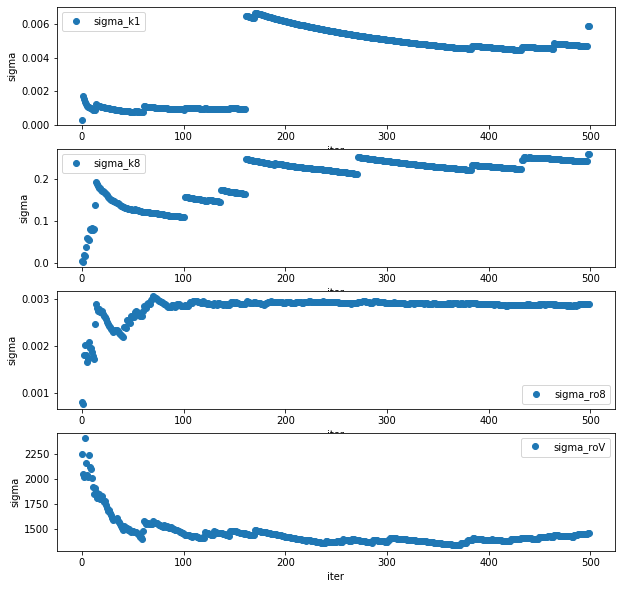

In [65]:
plt.figure(figsize=(10,10))
plt.subplot(4,1,1)
plt.plot(sigma_k1, 'o', label=r'sigma_k1')
plt.legend(loc='best')
plt.ylabel('sigma')
plt.xlabel('iter')
plt.subplot(4,1,2)
plt.plot(sigma_k8, 'o', label=r'sigma_k8')
plt.ylabel('sigma')
plt.xlabel('iter')
plt.legend()
plt.subplot(4,1,3)
plt.plot(sigma_ro8, 'o', label=r'sigma_ro8')
plt.legend(loc='best')
plt.ylabel('sigma')
plt.xlabel('iter')
plt.subplot(4,1,4)
plt.plot(sigma_roV, 'o', label=r'sigma_roV')
plt.ylabel('sigma')
plt.xlabel('iter')
plt.legend()
plt.show()

In [66]:
def intervals(parametr, sigma_1):
  opt=matrix_of_params[parametr].values[0]
  k1=matrix_of_params[parametr].values[1:]
  k1_=k1.sum()/M
  print('yeah')
  print(k1_)
  sigma_k1=math.sqrt(np.power(k1-k1_, 2).sum()/(M-1))
  left, right=k1_-sigma_1*1.96, k1_+sigma_1*1.96
  return left, opt, right

In [67]:
print('confidance interval for k1 is',intervals('k1', sigma_k1[-1]))
print('confidance interval for k8 is',intervals('k8', sigma_k8[-1]))
print('confidance interval for ro8 is',intervals('ro8', sigma_ro8[-1]))
print('confidance interval for roV is',intervals('roV', sigma_roV[-1]))


yeah
0.001272204457557156
confidance interval for k1 is (-0.01027134428662955, 4.625996598963772e-06, 0.012815753201743862)
yeah
0.18461550546366692
confidance interval for k8 is (-0.32119963167638343, 0.011977765234836707, 0.6904306426037172)
yeah
0.004078484666489303
confidance interval for ro8 is (-0.0015981001489384266, 0.0035720902779899015, 0.009755069481917032)
yeah
5250.2051061814445
confidance interval for roV is (2402.095153910956, 6657.999445229463, 8098.3150584519335)
